# Proyecto integrado
En este proyecto se realizó: Código en Python, Procesamiento de Datos, Análisis Exploratorio y Análisis Estadístico.
## Descripción del proyecto:
Trabaje para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tuvimos que identificar patrones que determinen si un juego tiene éxito o no. Esto nos permitio detectar proyectos prometedores y planificar campañas publicitarias. Se me proporcionaron datos que se remontan al año 2016 ya que se planeó una campaña para 2017.

El dataset "games" "/datasets/games.csv" viene adjunto. 

### Notas:
El siguiente proyecto viene con comentarios y explicaciones de lo que se realizó paso a paso, y por qué se tomaron dichas decisiones para obtener los siguientes resultados:

# Inicia Proyecto

### Librerias

In [1]:
#importar librerias
import pandas as pd 
from matplotlib import pyplot as plt #graficos
import seaborn as sns #graficos estadisticos
import numpy as np #matematicas complejas
from math import factorial #funcion factorial 
from scipy import stats as st #importa el modulo stats
import math as mt #fucniones matematicas basicas

Revisar el Dataset, ante de cargarlo, abrirlo y analizar como esta internamente, podemos ver el tipo de separaciones que maneja, para que al momento de importarlo se cargue de manera correcta.

Al revisar el archivo vemos que está separado por comas así que no hay delimitadores extraños puedan interferir con la importación de nuestro DataFrame, por lo que usar la función sep= o delimiter= no es necesario. ya que al no especificar el delimitador, pd.read_csv asume por defecto que es una coma (,) que es lo más común para los archivos CSV y pasa en nuestro caso.

### Importando Archivo

In [2]:
#leer el archivo y guardarlo en la variable df:
df= pd.read_csv("games.csv")

Revisemos rapidamnete si nuestro DF se importo de manera correcta 

In [3]:
#mostramos las primeras 10 filas de nuestro Dataset
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


La importación de los datos se ven bien, ya podemos comenzar con la preparación de los datos.

Obtengamos información general de nuestros Datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## ETAPA 1. DESCRIPCION DE DATOS

Observaciones Iniciales del DataFrame
Al cargar el conjunto de datos de juegos, estas son las primeras observaciones sobre la estructura y el contenido del DataFrame:

Estructura y Dimensiones:

+ Confirmamos que hemos importado un objeto DataFrame de Pandas.
El DataFrame consta de 16,715 filas (registros) y 11 columnas (variables), con índices de columna que van del 0 al 10, lo cual es lo esperado.

+ Nombres de las Columnas:
Los nombres de las columnas, como Name o Year_of_Release, emplean el formato snake_case y no contienen espacios adicionales, lo cual es ideal para la legibilidad del código.
Sin embargo, se observa un uso inconsistente de mayúsculas y minúsculas (por ejemplo, Year_of_Release). Para una mejor práctica, se recomienda estandarizar todos los nombres a minúsculas, ademas asi tambien lo pieden las instrucciones. 

+ Valores Ausentes:
Hay un número reducido de valores ausentes en columnas clave como "Name", "Year_of_Release" y "Genre".
Por otro lado, existe una cantidad significativa de valores nulos en "Critic_Score", "User_Score" y "Rating". Será crucial analizar la naturaleza de estos valores ausentes y determinar si es mejor eliminarlos, imputarlos o si su ausencia proporciona alguna información.

+ Tipos de Datos (Dtypes):
La columna Year_of_Release está como float64, pero dado que un año es un número entero, la mejor opción es convertirla a int64. Esto requerirá manejar los posibles valores nulos antes de la conversión.

+ User_Score aparece como object. Aunque no queremos alterar las puntuaciones de los usuarios, es probable que esta columna contenga valores no numéricos (como texto), lo que impedirá operaciones matemáticas directas. Se deberá investigar para determinar si se necesita alguna limpieza o conversión a un tipo numérico (por ejemplo, float64) si se planean análisis cuantitativos.

+ El resto de los tipos de datos (los que estan en tipo float64 son ventas y puntuaciones, y las de tipo object para texto) son apropiados para sus respectivas columnas, por lo que no cambiaremos su datatype. 

+ Uso de Memoria:
El DataFrame ocupa aproximadamente 1.4 MB de memoria. Este tamaño es bastante manejable y no debería causar problemas de rendimiento durante el procesamiento o el análisis.

In [5]:
#usamos la funcion sample rapidamnete para tener una muestra aleatoria de los datos.
df.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
4429,Puppy Luv: Spa and Resort,DS,2007.0,Simulation,0.40,0.00,0.00,0.03,NaN,tbd,E
9468,Shrek Smash n' Crash Racing,GC,2006.0,Racing,0.10,0.03,0.00,0.00,NaN,3.1,E
14945,A Ressha de Gyoukou 2001,PS2,2001.0,Simulation,0.00,0.00,0.03,0.00,NaN,NaN,NaN
5949,Outlaw Golf,XB,2002.0,Sports,0.22,0.06,0.00,0.01,72.0,6.9,T
7850,WWE All Stars,Wii,2011.0,Fighting,0.10,0.07,0.00,0.02,68.0,7,T


Me funciona como otra vista representativa de los datos alamcenados y para entender los datos con los que vamos a trabajar. 

Observaciones de la Vista Previa del DataFrame `.head() y sample()`

+ Valores Ausentes Confirmados: Tal como predijimos con info(), vemos claramente la presencia de NaN (Not a Number) en las columnas Critic_Score, User_Score, y Rating para varios registros. Esto refuerza la necesidad de una estrategia para manejar estos valores nulos.

+ User_Score como object: Observa la columna User_Score. En el registro 0 (Wii Sports), aparece 8, y en el registro 2 (Mario Kart Wii) aparece 8.3. estos valores tienen decimales.
Esto es un indicio muy fuerte de que, aunque la columna es de tipo object, podemos convertial a float64.

+ Year_of_Release como float64: Se confirma que la columna Year_of_Release contiene valores como 2006.0, 1985.0, etc., lo que valida nuestra observación de que es un float64 y que debe ser convertida a un tipo entero (int64), una vez que se manejen los posibles NaNs.

+ Rating como object se observan muchos valores con E o E10+ y NaN, investigando más a fondo esto quiere decir que: 
el hecho que "Rating" contenga valores como E, E10+, y NaN.  Es completamente normal y, de hecho, confirma que object es el dtype correcto para esta columna, ademas intentar convertir esta columna a un tipo numérico resultaría en errores, ya que las letras no tienen un valor matemático.
E (Everyone): Indica que el juego es apto para todas las edades.
E10+ (Everyone 10+): Significa que el juego es apropiado para mayores de 10 años.

+ Nota: Fue correcto tambien usar el metodo sample(), ya que sin el no hubiera identificado el E10+. 

## ETAPA 2. PROCESAMIENTO DE DATOS

Cambiar los nombres de las columnas a minusculas.

In [6]:
#obtenemos unicamanete el nombre de las columnas para facilitar su modificacion.
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
#vamos a crear un bucle para eliminar las mayusculas y poner todo en minuscula y quitar espacios extra.

new_col_names=[]  #se crear una uan lista vacia 
for old_name in df.columns:
    name_lowerd=old_name.lower()
    name_stripped=name_lowerd.strip()
    new_col_names.append(name_stripped)

df.columns = new_col_names


ahora validamos que los cambios se realizaron de manera correcta. 

In [8]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Codigo Extra 

Voy a agregar aqui un código extra que me percate ya en una etapa más avanzada, por lo que en etapa de conclusiones del análisis de datos no va a venir explicado este punto, pero calaramente esta experiencia, la dejo asi, para que mi instructor que revise mi proyecto  pueda ver mi proceso y por ende las correcion de errores que voy realizando sobre mi codigo. 
Más adelante vera porque salio esto, pero agredando ademas de validar que los nombres de las columnas, no presenten Mayusculas, espacios extra o en blanco y que esten separados por snake_case, es IMPORTANTE tambien revisar que las informacion de las columnas no presenten errores como espacios extra al inicio o al final ya que esto podría causar problemas al agrupar o buscar juegos, ya que "Frozen: Olaf's Quest" es diferente de "  Frozen: Olaf's Quest". y eso fue justo lo que paso mas adelante. Obviamnete vamos a solucionarlo.

In [9]:
#Eliminando Espacios Extras de la Columna 'name' de manera particular, ya que anteriormete vimos que puede hacerse en bucle tambien. 
df['name'] = df['name'].str.strip()
#para validar que especificamente el juego este ahora correcto
print("\nVerificando 'Frozen: Olaf\'s Quest' después de strip():")
print(df[df['name'] == "Frozen: Olaf's Quest"]['name'].unique())


Verificando 'Frozen: Olaf's Quest' después de strip():
["Frozen: Olaf's Quest"]


se ve bien... y sí, más adelante donde se uso para crear la gráfica, tambien se valido que todo estuviera corregido.
Se reviso que las demas columanas estuvieran en orden con ese detalle y al bucle anterior tambien se le agrego strip()

Cambiar los DataTypes de las columnas deaseadas.  "year_of_release" y "user_score"

In [10]:
#se cambia "year_of_release" de float a int
print(df["year_of_release"].dtype)
year_of_release_float= df['year_of_release'].fillna(0) #guardamos el datatype en una variable como float

float64


In [11]:
#se cambia "user_score" de object a float
print(df["user_score"].dtype)
user_score_object= df["user_score"]

object


Para cambiar  `"year_of_release" de float a int`, necesitamos considerar un detalle muy importante: la presencia de valores ausentes (NaN). Los tipos de datos enteros estándar de Python y NumPy (int, int64) no pueden contener NaN. Si intentamos la conversión directamente, obtendremos un error. por esos usamos .fillna(0) para rellanar valores ausentes a cero

In [12]:
df['year_of_release'] = df['year_of_release'].fillna(0).astype(int)
print(df["year_of_release"].dtype)
year_of_release_int= df['year_of_release'] #guardamos el datatype en una variable como int

int64


Para convertir la columna user_score de tipo `object a float`, necesitamos abordar un desafío común: la presencia de valores no numéricos. Como habíamos notado previamente, esta columna contiente el valor 'tbd' (to be determined), lo que impide una conversión directa.

Para convertir strings a valores numericos usamos el metodo llamado `to_numeric()
errors='coerce'` Este argumento es fundamental. Le dice a Pandas que si encuentra algún valor que no puede convertir a un número (como 'tbd' o cualquier otra cadena de texto no numérica), lo reemplace con NaN en lugar de generar un error.

In [13]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
print(df["user_score"].dtype)
user_score_float= df['user_score']

float64


observamos que los dos columnas cambiaron su data type de manera exitosa. 
pero es fundamental verificar que los cambios se hayan aplicado correctamente.    

In [14]:
#comprobamos que los datos o la distrubucion no hayan cambiado, asea no altere la distribucion de datos.
np.array_equal(year_of_release_float,year_of_release_int)

True

In [15]:
#comprobamos que los datos o la distrubucion no hayan cambiado, asea no altere la distribucion de datos.
np.array_equal(user_score_object,user_score_float)

False

El hecho de que np.array_equal(user_score_object, user_score_float) te haya devuelto False no significa que el cambio de tipo de dato haya estado mal.
cuando convertimos la columna user_score de object a float, ocurren dos cosas fundamentales:
Cambio de Tipo de Dato: La columna entera cambia de un tipo que puede contener cualquier objeto de Python (incluyendo strings como 'tbd') a un tipo que solo puede contener números flotantes.
Manejo de Valores No Numéricos: Los valores que no eran numéricos (como 'tbd') se transforman en NaN (Not a Number) durante la conversión a float usando errors='coerce'.

Por eso al comparar si los valores son iguales pues esto no pasa, muy al contrario de la columna "year_of_release" que ahi se no debian modificar ningun valor. 

### RESUEMEN

Ahora usemos laa funciones `info() y head()` nuevamente para ver la modificación de nuestros datos

In [16]:
df.info()
print("*"*100)
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
****************************************************************************************************


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Ahora podemos validar que los Dtype, se han modificado correctamente.
2   year_of_release  16715 non-null  int64    paso a ser int64
9   user_score       7590 non-null   float64  paso a ser float64

Los datos en "year_of_release" ahora estan correctos, pero aqui me viene otro analisi en una fecha, por lo que podriamos pasarlo a un DataTime, ya que es una fechas más que un numero entero, vaya por que no lo vi antes. 

Lo segundo que podmemos ver es que los nombres de las columnas efectivamnete son correctos, tal y como esperabamos. 

Antes de seguir vamos a cambiar nuevamente nuestra columna "year_of_release" ahora de int a datatime ya que es una fecha es el año 

In [17]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y', errors='coerce')
print(df['year_of_release'].dtype)

datetime64[ns]


In [18]:
df.info()
print("*"*100)
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       7590 non-null   float64       
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.4+ MB
****************************************************************************************************


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989-01-01,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006-01-01,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006-01-01,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009-01-01,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984-01-01,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Nota:
Que el resultado sea 2006-01-01 no es incorrecto y, en la mayoría de los casos, no dará problemas para nuestro análisis. Es el comportamiento estándar de pd.to_datetime() cuando solo se le proporciona un año.
Si filtramos por un año (ej. "juegos lanzados después de 2005"), el 2006-01-01 se comportará exactamente como esperarías.
Agrupación: Si agrupas por año `(df.groupby(df['year_of_release'].dt.year))`, el día y el mes no interferirán; la agrupación se hará solo por el componente del año.


Para complementar un poco más mi analisis, opte por extraer el año, de la columna "year_of_release" creando una nueva colunma llamda "year". Pero observemos y analicemos lo siguinte: al momento de tener nuestra columna de "year_of_release" en datatime tenemos valores ausentes como NaT; (recordemos que los valores ausentes pasaron a ser cero con `fillna(0)` para ser int64 y al convertirlo a datatime paron a ser NaT) entonces si solo usarmaos la siguinete codigo `df["year"]=df["year_of_release"].dt.year` vamos a notar que el dtype regresa a ser float64, esto porque pandas/numpy no saben que hacer con el valor ausente NaT y por defecto elijen float64 para acomodar los valores ausentes. por ello elejimos dejarlos como `Int64`, (Int con mayuscula) Este tipo está diseñado específicamente para permitir NaNs dentro de una columna de enteros,lo que te permitirá trabajar con años como enteros mientras mantienes la información sobre los valores ausentes.

In [19]:
df["year"]=df["year_of_release"].dt.year.astype("Int64")

In [20]:
print(df.head(10))
print("*"*100)
print(df.info())

                        name platform year_of_release         genre  na_sales  \
0                 Wii Sports      Wii      2006-01-01        Sports     41.36   
1          Super Mario Bros.      NES      1985-01-01      Platform     29.08   
2             Mario Kart Wii      Wii      2008-01-01        Racing     15.68   
3          Wii Sports Resort      Wii      2009-01-01        Sports     15.61   
4   Pokemon Red/Pokemon Blue       GB      1996-01-01  Role-Playing     11.27   
5                     Tetris       GB      1989-01-01        Puzzle     23.20   
6      New Super Mario Bros.       DS      2006-01-01      Platform     11.28   
7                   Wii Play      Wii      2006-01-01          Misc     13.96   
8  New Super Mario Bros. Wii      Wii      2009-01-01      Platform     14.44   
9                  Duck Hunt      NES      1984-01-01       Shooter     26.93   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  year  
0     28.96      3.77         8.

### Observaciones Finales del DataFrame

Estructura y Dimensiones:

+ Confirmamos que hemos importado un objeto DataFrame de Pandas.
El DataFrame consta de 16,715 filas (registros) y 12 columnas (variables), con índices de columna que van del 0 al 11, lo cual es lo esperado.

+ Nombres de las Columnas:
Los nombres de las columnas, estan correctas en minusculas y con snake_case

+ Valores Ausentes:
Hay un número reducido de valores ausentes en columnas clave como "Name", "Year_of_Release" y "Genre".
Por otro lado, existe una cantidad significativa de valores nulos en "Critic_Score", "User_Score" y "Rating". Será crucial analizar la naturaleza de estos valores ausentes y determinar si es mejor eliminarlos, imputarlos o si su ausencia proporciona alguna información.

+ Tipos de Datos (Dtypes):
Los timpos de datos en cada columna son los que esperabamos con la preparacion de Datos, todos estan correctos. 
dtypes: Int64(1), datetime64[ns](1), float64(6), object(4)

+ Uso de Memoria:
El DataFrame ocupa aproximadamente 1.5 MB de memoria. Este tamaño es bastante manejable y no debería causar problemas de rendimiento durante el procesamiento o el análisis.

## ETAPA 3.VALORES AUSENTES

Ahora podmeos continuar con los valores ausentes:

0. En la columna "name", tenemos solo dos valores ausentes , por lo que no sabemos cuales son las consolas utilizadas, esta podemos dejarla asi. o podemos elimnar esas filas, ya que no representan un valor significativo. 
1. En la columna "platform " no tenemos valores ausentes, todo esta correcto.
2. En la columna "year_of_release" tenemos 269 valores ausentes del tipo NaT, lo cual es correcto ya que no temenos más más informacion de los años.
3. En la columna "genre" tenemos solo dos valores ausentes, por lo que no sabemos  que genero pertenecen, esta podemos dejarla asi. o podemos elimnar esas filas, ya que no representan un valor significativo. 
4. En la columna "na_sales" no tenemos valores ausentes, todo esta correcto.
5. En la columna "eu_sales" no tenemos valores ausentes, todo esta correcto.
6. En la columna "jp_sales" no tenemos valores ausentes, todo esta correcto.
7. En la columna "other_sales" no tenemos valores ausentes, todo esta correcto.
8. En la columna "critic_score" tenemos 8538 valores ausentes del tipo NaN, estos podmeos rellenarlos con "desconocido", para no afectra la puntuacion al momento de hacer calculos con los datos. o incluso rellanarlos con la media o la mediana de los datos.
9. En la columna "user_score" tenemos 9125 valores ausentes del tipo NaN, estos podmeos rellenarlos con "desconocido", para no afectar la puntuacion al momento de hacer calculos con los datos; la leyenda tbd "to be determined"cambio a NaN cuando pasamos de object a float. o incluso rellanarlos con la media o la mediana de los datos.
10. En la columna "rating" tenemos 6766 valores ausentes del tipo NaN, estos podmeos rellenarlos con "'Not Rated", ya que son del tipo object.
11. En la columna "year" tenemos 269 valores ausentes del tipo NaN, lo cual es correcto ya que no temenos más más informacion de los años.

### Código para eleminar Valores Ausentes

In [21]:
# se elimina las 2 filas de name y genre
df.dropna(subset=['name', 'genre'], inplace=True)

# year of realese se elimina los datos ya que si necesitamos estos años para un cálculo que no tolera nulos
df.dropna(subset=['year'], inplace=True)

# critic_score, user_score Imputar con la media.
# Cambiamos de df['col'].fillna(..., inplace=True) a df['col'] = df['col'].fillna(...)
df['critic_score'] = df['critic_score'].fillna(df['critic_score'].mean())
df['user_score'] = df['user_score'].fillna(df['user_score'].mean())

# rating vamos a rellenar con una nueva categoría
# Cambiamos de df['col'].fillna(..., inplace=True) a df['col'] = df['col'].fillna(...)
df['rating'] = df['rating'].fillna('Not Rated')

Al quitar `inplace=True` y reasignar el resultado `(df['critic_score'] = ...)`, nos aseguramos de que el DataFrame `df` se actualice correctamente con los valores rellenados, eliminando la advertencia.

`df['critic_score'].fillna(df['critic_score'].mean(), inplace=True)` C:\Users\omarg\AppData\Local\Temp\ipykernel_12016\1784776982.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.

The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Lo que hicimos y por qué:
name y genre: Eliminamos las filas con nulos porque eran muy pocas (2 en cada una). La eliminación es un método directo y la pérdida de datos es insignificante.
year y year_of_release: También eliminamos estas filas. Dado que los años son cruciales para el análisis temporal y no teníamos información para imputarlos de manera confiable, eliminar las filas sin un año conocido es la opción más segura para asegurar la integridad de los cálculos basados en el tiempo.
critic_score y user_score: Optamos por la imputación por la media. Esta es una estrategia común para columnas numéricas con muchos valores ausentes cuando no queremos perder demasiadas filas. La media ayuda a preservar la tendencia central de los datos.
rating: Rellenamos los valores nulos con la cadena 'Not Rated'. Esto es ideal para columnas categóricas, ya que la ausencia de una clasificación es, en sí misma, una categoría de información que podría ser relevante.
Ahora nuestro DataFrame está mucho más limpio y listo para un análisis más profundo. 


### Veamos ahora nustros valores Ausentes

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16444 non-null  object        
 1   platform         16444 non-null  object        
 2   year_of_release  16444 non-null  datetime64[ns]
 3   genre            16444 non-null  object        
 4   na_sales         16444 non-null  float64       
 5   eu_sales         16444 non-null  float64       
 6   jp_sales         16444 non-null  float64       
 7   other_sales      16444 non-null  float64       
 8   critic_score     16444 non-null  float64       
 9   user_score       16444 non-null  float64       
 10  rating           16444 non-null  object        
 11  year             16444 non-null  Int64         
dtypes: Int64(1), datetime64[ns](1), float64(6), object(4)
memory usage: 1.6+ MB


In [23]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.000000,8.00000,E,2006
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,68.994363,7.12633,Not Rated,1985
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.000000,8.30000,E,2008
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.000000,8.00000,E,2009
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,68.994363,7.12633,Not Rated,1996
5,Tetris,GB,1989-01-01,Puzzle,23.20,2.26,4.22,0.58,68.994363,7.12633,Not Rated,1989
6,New Super Mario Bros.,DS,2006-01-01,Platform,11.28,9.14,6.50,2.88,89.000000,8.50000,E,2006
7,Wii Play,Wii,2006-01-01,Misc,13.96,9.18,2.93,2.84,58.000000,6.60000,E,2006
8,New Super Mario Bros. Wii,Wii,2009-01-01,Platform,14.44,6.94,4.70,2.24,87.000000,8.40000,E,2009
9,Duck Hunt,NES,1984-01-01,Shooter,26.93,0.63,0.28,0.47,68.994363,7.12633,Not Rated,1984


Este es un indicador clave. Comenzamos con 16,715 filas y ahora tenemos 16,444. La diferencia (271 filas) corresponde a las 2 filas que eliminamos por nulos en name o genre, y las 269 filas que eliminaste por nulos en year (o year_of_release). Es una pérdida mínima de datos (alrededor del 1.6%) para asegurar la calidad de las filas restantes. 
Todas tus columnas ahora tienen 16444 valores no nulos. Esto significa que hemos manejado exitosamente todos los valores ausentes en cada columna, rellenándolos o eliminando las filas pertinentes. Nuestro DataFrame está ahora completo y listo para el análisis.

### Valores Duplicados

Vamos a implemetar algo super rapido y sencillo, para verificar si tenemos valores duplicados en nuestro DataFrame.

1. Verificar si hay alguna fila duplicada
Para saber rápidamente si existe al menos una fila duplicada en todo el DataFrame:
df.duplicated(): Este método devuelve una Serie Booleana (True/False) donde True indica que la fila es una duplicada de una fila anterior. Por defecto, considera todas las columnas.
.any(): Comprueba si hay al menos un True en la Serie Booleana, lo que significa que existe al menos una fila duplicada.

In [24]:
hay_duplicados = df.duplicated().any()

if hay_duplicados:
    print("¡Sí, hay filas duplicadas en el DataFrame!")
else:
    print("No se encontraron filas completamente duplicadas en el DataFrame.")

No se encontraron filas completamente duplicadas en el DataFrame.


2. Contar el número de filas duplicadas
Para saber exactamente cuántas filas duplicadas existen:
.sum(): Como True se evalúa como 1 y False como 0 en operaciones numéricas, la suma de la Serie Booleana te da el conteo total de filas marcadas como duplicadas.

In [25]:
num_duplicados = df.duplicated().sum()
print(f"Número total de filas duplicadas: {num_duplicados}")

Número total de filas duplicadas: 0


Que todas las comprobaciones de duplicados te hayan dado cero o No se encontraron filas  duplicadas, significa que el DataFrame no contiene filas completamente idénticas.
Tenemos un DataFrame libre de duplicados; esto es muy bueno, ya que asegura que cada registro en nuestro análisis representa una entrada única y evita que tus estadísticas o modelos se vean sesgados por datos repetidos.

### Resumen del Procesamiento de Datos

Resumen del Proceso de Limpieza y Preprocesamiento de Datos
Carga y Observación Inicial (pd.read_csv(), df.info(), df.head()):

+ Primero, cargamos el archivo CSV en un DataFrame de Pandas.
Utilizamos` df.info()` para obtener una visión general de la estructura: número de filas y columnas, conteo de valores no nulos por columna y sus tipos de datos. Esto nos permitió identificar columnas con valores ausentes (Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating) y tipos de datos incorrectos (Year_of_Release como float64, User_Score como object).
`df.head()` nos dio una vista preliminar de los datos reales para confirmar visualmente las observaciones de `info().`

+ Estandarización de Nombres de Columnas:
Identificamos que los nombres de las columnas tenían mayúsculas y minúsculas inconsistentes (ej., Year_of_Release).
Convertimos todos los nombres a minúsculas (year_of_release, user_score, etc.) usando `df.columns = df.columns.str.lower().` Esto mejora la consistencia y facilita el manejo del DataFrame.

+ Conversión de Tipos de Datos (Dtypes):
year_of_release: Originalmente float64. Lo convertimos a datetime64[ns] usando `pd.to_datetime(df['year_of_release'], format='%Y', errors='coerce').` Esto permite un análisis temporal más robusto.
user_score: Originalmente object (contenía números y 'tbd'). Lo convertimos a float64 usando `pd.to_numeric(df['user_score'], errors='coerce')`, lo que transformó 'tbd' y otros valores no numéricos a NaN.
Creación de la columna year: Extrajimos el año de year_of_release en una nueva columna llamada year `(df['year'] = df['year_of_release'].dt.year).` Luego, la convertimos a Int64 (el tipo entero de Pandas que permite NaNs) usando `.astype('Int64')` para una representación numérica entera limpia.

+ Manejo de Valores Ausentes (NaN/NaT):
name y genre: Eliminamos las filas donde estos valores eran nulos `(df.dropna(subset=['name', 'genre'], inplace=True))`, ya que eran muy pocas y la eliminación no impactaba significativamente el conjunto de datos.
year / year_of_release: Eliminamos las filas con valores ausentes en la columna year `(df.dropna(subset=['year'], inplace=True))`. Esto asegura que todos los juegos considerados en análisis temporales tienen un año válido.
critic_score y user_score: Rellenamos los valores nulos con la media de sus respectivas columnas 
rating: Rellenamos los valores nulos con una nueva categoría 'Not Rated' `(df['rating'].fillna('Not Rated', inplace=True))`, lo cual es ideal para columnas categóricas.

+ Verificación de Duplicados:
Finalmente, comprobamos si existían filas completamente duplicadas en el DataFrame utilizando `df.duplicated().sum()`. Determinamos que no había ninguna, lo cual es una señal de un dataset limpio.

+ Definitivamente, el conjunto de pasos que acabamos de realizar, conocido como limpieza y preprocesamiento de datos, es a menudo la fase más tardada y, en ocasiones, la más desafiante en cualquier proyecto de análisis de datos, junto con la toma de desciciones dificiles, como tener que eliminar filas. 


In [26]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,year
count,16444,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.0
mean,2006-06-27 11:23:02.729262976,0.264012,0.145930,0.078487,0.047594,68.994363,7.126330,2006.486256
min,1980-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,1980.0
25%,2003-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,68.994363,7.126330,2003.0
50%,2007-01-01 00:00:00,0.080000,0.020000,0.000000,0.010000,68.994363,7.126330,2007.0
75%,2010-01-01 00:00:00,0.240000,0.110000,0.040000,0.030000,70.000000,7.300000,2010.0
max,2016-01-01 00:00:00,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,2016.0
std,NaN,0.818378,0.506716,0.311100,0.188005,9.698542,1.010109,5.875525


Un poco mas de informacion extra para conocer más datos, como la suma, la media, los maximo y minimos, que usaremos más adelante.
y podemos compararlos con la descripcion de los datos que dicen:
— Critic_Score (máximo de 100) 
actualmente lo tenemos en maximo 98, seguramente por la depuracion de los valores ausentes, nada grave.
User_Score (máximo de 10) 
actualmente lo tenemos en maximo 9.7, seguramente por la depuracion de los valores ausentes, nada grave.

## ETAPA 4. ANALIZAR DATOS 

In [27]:
# Calcular las ventas totales sumando las ventas de todas las regiones
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [28]:
#veamos si se creo bien nuestra columna.
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.000000,8.00000,E,2006,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,68.994363,7.12633,Not Rated,1985,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.000000,8.30000,E,2008,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.000000,8.00000,E,2009,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,68.994363,7.12633,Not Rated,1996,31.38


Conteo de Juegos Lanzados por Año
Para saber cuántos juegos se lanzaron en cada año, podemos usar la columna "year" que creamos y agrupar los datos por ella. Luego, simplemente contamos el número de juegos en cada grupo.

df['year'].value_counts(): Este método es perfecto para contar las ocurrencias únicas de cada valor en una columna. Nos devolverá una Serie donde el índice será cada año único y los valores serán el conteo de juegos para ese año.
.sort_index(): Por defecto, value_counts() ordena los resultados de mayor a menor conteo. sort_index() nos ayuda a ordenar los años cronológicamente para una mejor lectura y análisis de tendencias.

+ ## Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

In [29]:
# Contar el número de juegos por cada año de lanzamiento
games_per_year = df['year'].value_counts().sort_index()
print("Número de juegos lanzados por año:")
print(games_per_year)

Número de juegos lanzados por año:
year
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: count, dtype: Int64


Observando los resultados:
y respondiendo a la pregunta ¿Son significativos los datos de cada período?
vaya que si los son, podemos aprender mucho de estos resultados:

+ Primeros Años (1980 - 1993):
Vemos que en la década de 1980 y principios de los 90, el número de lanzamientos por año es relativamente bajo (entre 9 y 60 juegos por año).
Significación: Los datos de este período son menos significativos para analizar tendencias de la industria moderna. Reflejan una época temprana del desarrollo de videojuegos con menos plataformas, menos desarrolladores y un mercado mucho más pequeño y de nicho. Cualquier análisis de popularidad o tendencias de mercado basado únicamente en estos años podría ser sesgado y no representativo de la industria del videojuego en su conjunto. Las bajas cifras también pueden indicar que la recopilación de datos para esos años es menos completa.

+ Período de Crecimiento (1994 - 2001):
Hay un crecimiento constante en el número de lanzamientos, pasando de 121 en 1994 a 482 en 2001. Esto coincide con la popularización de las consolas de 32/64 bits (PlayStation, Nintendo 64) y el crecimiento del PC gaming.
Significación: Los datos de este período comienzan a ser más significativos, ya que la industria está en una fase de expansión y hay un volumen de juegos que permite observar algunas tendencias.

+ Período Pico (2002 - 2011):
Este es claramente el período más activo en términos de lanzamientos. Hay un aumento drástico a partir de 2002 (829 juegos) y alcanza su punto máximo en 2008 (1427 juegos) y 2009 (1426 juegos). Esto se alinea con la era de consolas como PS2, Xbox, GameCube, y luego PS3, Xbox 360 y Wii, que tuvieron una enorme base de usuarios y un gran volumen de producción de juegos.
Significación: Los datos de este período son altamente significativos. Proporcionan la mayor densidad de información y son ideales para identificar las principales tendencias de la industria, géneros populares, rendimiento de plataformas y puntuaciones. Si tu objetivo es analizar la industria del videojuego en su punto más álgido, este es tu período clave.

+ Declive Reciente (2012 - 2016):
A partir de 2012, hay un descenso notable en el número de lanzamientos anuales (de 653 en 2012 a 502 en 2016).
Significación: Los datos de este período son significativos, pero hay que interpretarlos con cautela. Este descenso no necesariamente significa un declive de la industria; más bien, puede reflejar:
+ Cambios en el mercado: Un giro hacia menos lanzamientos físicos, el auge de los juegos móviles.
Incompletitud del dataset: Es posible que el dataset esté incompleto para los años más recientes (especialmente 2016, ya que probablemente se recolectó en algún punto de 2016 o principios de 2017). justo cómo lo dice en la descripcion de los Datos (Es posible que los datos de 2016 estén incompletos.)

+ ## Observa cómo varían las ventas de una plataforma a otra.
+ ## Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas.
+ ## ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

Análisis de Ventas por Plataforma
Vamos a desglosar cómo varían las ventas entre las diferentes plataformas, vamos a identificar las más exitosas y observar los ciclos de vida.

### 1. Ventas Totales por Plataforma:
Primero, calculemos las ventas totales para cada plataforma para identificar las más grandes.

In [30]:
# Calcular las ventas totales por plataforma
platform_total_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

print("Ventas totales por plataforma:")
print(platform_total_sales)

Ventas totales por plataforma:
platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


Esto nos da una lista ordenada de plataformas por sus ventas globales acumuladas, de mayor a menor; con esta información, podemos identificar las plataformas con mayores ventas que son las que analizaremos a fondo.

### Observaciones:

Dominio de PlayStation y Xbox/Nintendo: Las primeras seis plataformas (PS2, X360, PS3, Wii, DS, PS) han acumulado, por mucho, las mayores ventas globales en este dataset. Esto refleja la era dorada de estas consolas.
PS2 como el Rey Absoluto: La PlayStation 2 (PS2) se destaca con ventas significativamente más altas que cualquier otra plataforma, confirmando su estatus legendario en la historia de los videojuegos.
Competencia Cerrada en la Siguiente Generación: Xbox 360 (X360), PlayStation 3 (PS3) y Wii muestran ventas muy competitivas entre sí, lo que indica una feroz batalla por el mercado en esa generación de consolas.
Portátiles de Nintendo Fuertes: La Nintendo DS (DS) también tiene un rendimiento muy sólido, destacando la importancia del mercado de consolas portátiles en su momento.
Plataformas Recientes y Legado: PS4, aunque más reciente en el dataset, ya se posiciona bien. Plataformas más antiguas como PS (PlayStation 1) también muestran un poder de venta considerable a lo largo de su vida útil.


### 2. Distribución Anual de Ventas para Plataformas Principales

Una vez idetntificadas las plataformas con mayores ventas (podemos seleccionar, por ejemplo, las 5 o 10 primeras), vamos a observar cómo se distribuyeron sus ventas año tras año. Esto nos ayudará a ver sus picos de popularidad y su eventual declive.

In [31]:
# Definir un umbral o un número de plataformas principales para analizar
# Por ejemplo, las 10 plataformas con mayores ventas totales
top_platforms = platform_total_sales.head(10).index.tolist()

# Filtrar el DataFrame para incluir solo estas plataformas principales
df_top_platforms = df[df['platform'].isin(top_platforms)]

# Agrupar por año y plataforma, y sumar las ventas totales
platform_sales_by_year = df_top_platforms.groupby(['year', 'platform'])['total_sales'].sum().unstack(fill_value=0)

print("Ventas anuales de las plataformas principales:")
print(platform_sales_by_year)

Ventas anuales de las plataformas principales:
platform    3DS      DS    GBA      PS     PS2     PS3     PS4    PSP     Wii  \
year                                                                            
1985       0.00    0.02   0.00    0.00    0.00    0.00    0.00   0.00    0.00   
1994       0.00    0.00   0.00    6.03    0.00    0.00    0.00   0.00    0.00   
1995       0.00    0.00   0.00   35.96    0.00    0.00    0.00   0.00    0.00   
1996       0.00    0.00   0.00   94.70    0.00    0.00    0.00   0.00    0.00   
1997       0.00    0.00   0.00  136.17    0.00    0.00    0.00   0.00    0.00   
1998       0.00    0.00   0.00  169.49    0.00    0.00    0.00   0.00    0.00   
1999       0.00    0.00   0.00  144.53    0.00    0.00    0.00   0.00    0.00   
2000       0.00    0.00   0.07   96.37   39.17    0.00    0.00   0.00    0.00   
2001       0.00    0.00  61.53   35.59  166.43    0.00    0.00   0.00    0.00   
2002       0.00    0.00  74.16    6.67  205.38    0.00    0.00

### NOTA DE CODIGO: 
`unstack()` pivota la tabla para que las plataformas se conviertan en columnas y los años en filas, y `fill_value=0` asegura que los años en los que una plataforma no tuvo ventas muestren un 0 en lugar de NaN.

Al observar la tabla platform_sales_by_year, podemos ver claramente qué plataformas tienen ventas en los años más recientes y cuáles dejaron de tener actividad comercial. Las plataformas que muestran ventas significativas en años anteriores, pero ceros en los años más recientes del dataset, son las que "ya no tienen ventas".

### Observaciones:

Ciclos de Vida Claros: Podemos observar el auge y caída de cada plataforma. Por ejemplo:
PS1: Tuvo su auge a finales de los 90 (1997-1999) y declinó rápidamente a principios de los 2000.
PS2: Dominó los primeros años de los 2000 (2001-2004) antes de un declive gradual.
DS y PSP: Consolas portátiles con picos importantes a mediados de los 2000.
X360, PS3, Wii: Tuvieron sus picos alrededor de 2008-2011, mostrando la competencia simultánea.
PS4 y 3DS: Son las plataformas más recientes con ventas significativas en los últimos años del dataset (2013-2016)


Plataformas que Solían Ser Populares pero que Ahora No Tienen Ventas
Definitivamente "desaparecidas" en este dataset (ventas cercanas a cero en 2014-2016):

PS1: Prácticamente cero ventas desde 2004.
PS2: Ventas casi nulas desde 2012.
DS: Prácticamente cero desde 2014.
GBA: Prácticamente cero desde 2008.
PSP: Cero o insignificante desde 2014.
Wii: Ventas muy bajas en 2015-2016.
X360: Ventas muy bajas en 2016.
PS3: Ventas muy bajas en 2016.
PS4: Muestra un crecimiento constante y significativo hasta el final del dataset.
3DS: Aún tiene ventas, aunque con un descenso en los últimos años, lo que sugiere el final de su ciclo dominante.


### 3. Duración de los Ciclos de Vida de las Plataformas

Para entender cuánto tardan las plataformas en aparecer y desaparecer, analizaremos la tabla platform_sales_by_year.

Aparición: El primer año en que una plataforma registra ventas significativas (es decir, deja de ser 0).

Desaparición: El último año en que una plataforma registra ventas antes de que sus ventas caigan a 0 o se vuelvan insignificantes en los años posteriores.

Podemos estimar el ciclo de vida calculando la diferencia entre el último y el primer año de ventas para cada plataforma.

In [32]:
# Calcular el primer y último año de actividad para cada plataforma
platform_years = df.groupby('platform')['year'].agg(['min', 'max'])  #Agrupa por plataforma y encuentra el año mínimo y máximo de venta.
platform_years['lifespan_years'] = platform_years['max'] - platform_years['min'] #Calcula la duración en años.

print("Ciclo de vida de las plataformas (en años):")
print(platform_years.sort_values(by='lifespan_years', ascending=False).head(15)) # Mostrar las 15 primeras con mayor ciclo de vida
print("*"*100)
print(platform_years.sort_values(by='lifespan_years', ascending=True).head(15)) # Mostrar las 15 primeras con menor ciclo de vida

Ciclo de vida de las plataformas (en años):
           min   max  lifespan_years
platform                            
PC        1985  2016              31
DS        1985  2013              28
GB        1988  2001              13
NES       1983  1994              11
X360      2005  2016              11
PSP       2004  2015              11
PS2       2000  2011              11
PS3       2006  2016              10
DC        1998  2008              10
Wii       2006  2016              10
SNES      1990  1999               9
2600      1980  1989               9
PS        1994  2003               9
XB        2000  2008               8
GBA       2000  2007               7
****************************************************************************************************
           min   max  lifespan_years
platform                            
PCFX      1996  1996               0
GG        1992  1992               0
TG16      1995  1995               0
3DO       1994  1995               1
SCD 

### Sospecha: (Datos Atípicos)
"PC" y "DS" son atípicos: La PC (31 años) es una plataforma continua, no una consola con un ciclo de vida definido, por lo que su lifespan_years es engañoso en este contexto. La DS con 28 años también parece un error en los datos originales o una clasificación de nombres (Nintendo DS se lanzó en 2004, no en 1985).

### Observaciones:

Ciclos de Vida Promedio (Consolas Dominantes): Ignorando los atípicos, las consolas más exitosas (PS2, X360, PS3, Wii, PSP, NES, PS) tienen una vida útil de 9 a 11 años en términos de ventas significativas de juegos registrados. Esto sugiere que una plataforma de consola exitosa puede mantener relevancia en el mercado por aproximadamente una década.

Ciclos de Vida Más Cortos (Consolas Menos Exitosas): Las plataformas con menor ciclo de vida (3DO, SCD, WS, NG, GEN, WiiU, PSV, 3DS, SAT, N64) tienen duraciones de 1 a 6 años. Esto podría indicar:
Fallo comercial y rápido descontinuo.
Naturaleza de nicho o experimental.

Plataformas que simplemente no lograron consolidarse en el mercado.
En el caso de PS4, XOne, 3DS y WiiU, su ciclo es de 3-5 años hasta el final de este dataset (2016), lo que no significa que "desaparecieron" en ese año, sino que el dataset termina ahí. Habrían continuado vendiendo más allá de 2016. 

### Conclusiones Generales:

La industria del videojuego muestra ciclos de vida de plataformas bien definidos. Las consolas más exitosas tienden a tener una vida útil activa de alrededor de 10-11 años. Las nuevas plataformas (como PS4 y XOne) tardan unos 2-3 años en establecerse con un crecimiento fuerte, mientras que las antiguas plataformas tardan unos 1-3 años en ver una caída drástica de ventas después de su pico de popularidad, antes de volverse obsoletas. Las plataformas con ciclos de vida muy cortos a menudo indican un fracaso en el mercado.


+ ## Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.
Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

Para construir un modelo que pueda predecir tendencias o características de juegos para 2017, necesitamos basarnos en datos recientes y representativos de la industria actual.

Recordemos nuestras observaciones de la distribución de juegos por año:

Picos de Lanzamientos (2002 - 2011): Este fue el período más activo, pero también es una era que incluye consolas que ya han desaparecido o están en su etapa final. Si bien es el pico, el comportamiento del mercado puede haber cambiado significativamente desde entonces.
Declive Reciente (2012 - 2016): Aunque los números de lanzamientos son más bajos, este período representa la dinámica de la industria más cercana a 2017. Vimos el surgimiento de plataformas como PS4 y Xbox One, y el declive final de las consolas de la generación anterior (PS3, X360, Wii).

Período Relevante
Considerando que queremos construir un modelo para 2017, y que el mercado de videojuegos evoluciona rápidamente, usar datos excesivamente antiguos podría introducir ruido y patrones obsoletos. Las tendencias de 2002-2011 son importantes históricamente, pero las plataformas y el comportamiento del consumidor pueden haber cambiado demasiado como para que sean las más predictivas para 2017.

Un período ideal para modelar 2017 debería capturar las tendencias más recientes y la influencia de las plataformas activas en esos años. Por lo tanto, el período más relevante y predictivo sería de 2012 a 2016.

Ventajas de 2012-2016:
Incluye la transición y el auge de la "actual" generación de consolas (PS4, XOne) hasta el final de nuestro dataset.
Refleja la fase más reciente de la industria en cuanto a modelos de negocio, preferencias de género y comportamiento del consumidor.
Aunque el número de lanzamientos es menor que en el pico de 2008-2009, la calidad y la representatividad de estos datos para predecir el futuro cercano son mayores.
Ignorar los datos anteriores a 2012 nos permite centrarnos en las dinámicas que son más propensas a persistir o evolucionar en 2017, descartando la influencia de plataformas y mercados que ya no son dominantes.

Vamos a filtrar nuestro DataFrame df para quedarnos solo con las filas correspondientes a los años de 2012 a 2016 

In [33]:
# Definir el período de análisis
start_year = 2012
end_year = 2016

# Filtrar el DataFrame para incluir solo los años dentro del período relevante
# Usamos la columna 'year' que ya está en formato Int64
df_relevant = df[(df['year'] >= start_year) & (df['year'] <= end_year)].copy()

# Verificar la información del nuevo DataFrame relevante
print(f"DataFrame filtrado para el período {start_year}-{end_year}:")
print(df_relevant.info())
print("\nPrimeras 5 filas del DataFrame relevante:")
print(df_relevant.head())

DataFrame filtrado para el período 2012-2016:
<class 'pandas.core.frame.DataFrame'>
Index: 2886 entries, 16 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             2886 non-null   object        
 1   platform         2886 non-null   object        
 2   year_of_release  2886 non-null   datetime64[ns]
 3   genre            2886 non-null   object        
 4   na_sales         2886 non-null   float64       
 5   eu_sales         2886 non-null   float64       
 6   jp_sales         2886 non-null   float64       
 7   other_sales      2886 non-null   float64       
 8   critic_score     2886 non-null   float64       
 9   user_score       2886 non-null   float64       
 10  rating           2886 non-null   object        
 11  year             2886 non-null   Int64         
 12  total_sales      2886 non-null   float64       
dtypes: Int64(1), datetime64[ns](1), float64(7), object

Al crear df_relevant, estamos construyendo un subconjunto de nuestro DataFrame principal, que será la base para cualquier modelo predictivo para 2017. La palabra clave .copy() es importante para asegurar que trabajamos con una copia independiente

en este punto vamos a regresar a nuestros dataframe original, justo antes de filtrarlo para modelos predictivos del 2017, para continuar nuestro analisis de datos. 

+ ## ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

1. Plataformas Líderes en Ventas Totales
Ya calculamos las ventas totales por plataforma, pero vamos a recordarlas para tenerlas a mano. Esto nos dará una idea de las plataformas con mayor rendimiento general en todo el periodo de los datos.

In [34]:
print(platform_total_sales.head(10)) # Mostramos las top 10

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64


2. Identificar Plataformas en Crecimiento y en Reducción
Para ver las tendencias de crecimiento o reducción, debemos analizar las ventas anuales de las plataformas principales. Observar los cambios en las ventas año tras año nos permitirá identificar cuáles plataformas están ganando tracción (creciendo) y cuáles están perdiéndola (reduciéndose).

Utilizaremos la tabla platform_sales_by_year que ya generamos, que muestra las ventas anuales de las plataformas principales. Re-generémosla para asegurarnos de que estamos trabajando con el DataFrame completo:

In [35]:
print(platform_sales_by_year.tail(15))

platform    3DS      DS    GBA    PS     PS2     PS3     PS4    PSP     Wii  \
year                                                                          
2002       0.00    0.00  74.16  6.67  205.38    0.00    0.00   0.00    0.00   
2003       0.00    0.00  56.67  2.07  184.31    0.00    0.00   0.00    0.00   
2004       0.00   17.27  77.91  0.00  211.81    0.00    0.00   7.06    0.00   
2005       0.00  130.14  33.86  0.00  160.66    0.00    0.00  43.84    0.00   
2006       0.00  119.81   5.28  0.00  103.42   20.96    0.00  55.32  137.15   
2007       0.00  146.94   3.40  0.00   75.99   73.19    0.00  46.93  152.77   
2008       0.00  145.31   0.00  0.00   53.90  118.52    0.00  34.55  171.32   
2009       0.00  119.54   0.00  0.00   26.40  130.93    0.00  37.78  206.97   
2010       0.00   85.02   0.00  0.00    5.64  142.17    0.00  35.04  127.95   
2011      63.20   26.18   0.00  0.00    0.45  156.78    0.00  17.82   59.65   
2012      51.36   11.01   0.00  0.00    0.00  107.36

+ Plataformas en Crecimiento: Busca plataformas que muestren un aumento constante en sus ventas en los años más recientes (2013-2016). La PS4 es un claro ejemplo, con ventas que suben año tras año en este período. Otras plataformas que aparecen en los años más recientes con ventas crecientes (si las tuviéramos en la lista, como XOne si la hubiéramos incluido en el top 10) también serían candidatas.

+ Plataformas en Reducción: Observa las plataformas cuyas ventas han estado disminuyendo constantemente en los años recientes, o que han caído a cero. Ejemplos claros son PS3, X360, Wii y 3DS (en los últimos años de nuestro dataset), cuyas ventas anuales muestran una clara tendencia a la baja después de sus picos. PS2, DS, GBA, y PS son ejemplos de plataformas que ya están en su etapa final o han desaparecido.

+ Plataformas Potencialmente Rentables
La "rentabilidad" es un concepto más amplio que solo las ventas, pero desde la perspectiva de los datos que tenemos, podemos identificar plataformas con potencial de ventas continuo en el futuro cercano (más allá de 2016).
Basándonos en la tabla de ventas anuales y nuestro análisis de ciclos de vida, las plataformas potencialmente rentables son aquellas que: Están en una fase de crecimiento o manteniéndose fuertes en los años más recientes de tu dataset (2013-2016).
Son parte de la "nueva" generación de consolas que aún no han alcanzado su pico de ventas o que lo alcanzaron recientemente y todavía tienen una base de usuarios activa.
Han demostrado un fuerte volumen de ventas anuales en su pico y una base instalada grande.

Según nuestros datos, las plataformas potencialmente rentables serían principalmente:
+ PS4: Esta es la plataforma más clara. Muestra un crecimiento robusto en ventas anuales hasta 2016 (25.99M en 2013 a 118.90M en 2015, y 69.25M en 2016). Dado que los datos terminan en 2016, es muy probable que su crecimiento continuara más allá de ese año.
+ XOne (Xbox One): Aunque no está en tu top 10 que analizamos a fondo en la matriz de ventas anuales, si la hubieras incluido, probablemente mostraría una tendencia similar a PS4, siendo parte de la misma generación. Por su lugar en el platform_total_sales, es una de las "siguientes" líderes.

Otras plataformas a considerar, aunque con cautela:
+ 3DS: Todavía tiene ventas considerables en los últimos años (15.14M en 2016), pero muestra una tendencia a la baja. Su rentabilidad futura dependería del ciclo de Nintendo para una nueva portátil.
+ PC: Aunque su total de ventas la pone en el top 10, es una categoría "siempre verde" y no sigue el ciclo de vida de una consola. Siempre es una plataforma relevante, pero no experimenta los picos y caídas de las consolas generacionales. Su rentabilidad es constante y menos volátil.
+ Las plataformas de la generación anterior como PS3, X360, Wii y las portátiles como DS, PSP ya están en clara reducción de ventas. Aunque tuvieron enormes ventas históricas, su potencial de rentabilidad hacia 2017 y más allá es mínimo, ya que sus ciclos de vida han terminado o están en sus etapas finales.



### En resumen, 
PS4 emerge como la plataforma más prometedora en términos de rentabilidad potencial hacia adelante, basándonos en las tendencias de ventas observadas hasta 2016.

### Nota: 
Si hubiéramos usado el DataFrame filtrado df_relevant (que contiene datos solo de 2012 a 2016) para las preguntas anteriores, nuestras respuestas habrían cambiado drásticamente, ofreciéndonos una perspectiva mucho más enfocada en las tendencias recientes; las plataformas en crecimiento/reducción y los ciclos de vida habrían sido muy diferentes y más pertinentes para el mercado actual y futuro cercano.

Aquí detallamos cómo habrían cambiado las respuestas:

1.-Ventas Totales por Plataforma Si hubiéramos calculado las ventas totales solo con df_relevant (2012-2016), las plataformas líderes habrían sido las de la generación más reciente y las que estaban activas en ese período: PS4 y XOne habrían dominado las primeras posiciones, ya que son las consolas que lanzaron y crecieron significativamente en este período, que es justo mi conclusion anterior en cuanto a qye la PS4 emergiria como la plataforma más prometedora. PS3 y X360 seguirían apareciendo, pero con ventas totales mucho menores, reflejando su fase de declive en esos años. Plataformas como PS2, DS, Wii, PS, GBA (las históricamente más vendidas en el dataset completo) apenas aparecerían o tendrían ventas insignificantes en este ranking. Sus ciclos de vida habrían terminado en su mayoría antes o al principio de 2012. Cambio clave: La perspectiva cambiaría de un "histórico" a un "actual y emergente". Las plataformas históricamente masivas serían reemplazadas por las relevantes en el presente cercano.

2.-Distribución Anual de Ventas y Tendencias de Crecimiento/Reducción El análisis de la tabla de ventas anuales de las plataformas principales (ahora solo para 2012-2016) sería mucho más conciso y enfocado: Plataformas en Crecimiento: PS4 y XOne serían los claros protagonistas, mostrando un crecimiento robusto y constante desde su lanzamiento en 2013 hasta 2016. Serían las únicas con una tendencia ascendente marcada. Plataformas en Reducción: PS3 y X360 mostrarían un descenso claro y constante en ventas anuales a lo largo de este período, confirmando su transición hacia el final de su ciclo de vida. WiiU y 3DS también mostrarían sus propias dinámicas, con WiiU luchando por ganar tracción y 3DS mostrando el inicio de su declive a medida que avanzaban los años. Plataformas "Ausentes": Todas las plataformas anteriores a esta generación (PS2, DS, Wii, GBA, PS, etc.) simplemente no aparecerían en este análisis, ya que sus ventas habrían sido nulas o insignificantes en el período 2012-2016. Cambio clave: Habríamos ignorado completamente los picos históricos y los períodos de gran éxito de plataformas anteriores. El enfoque estaría 100% en la dinámica del mercado en la "actualidad" (hasta 2016). Esto es precisamente lo que buscamos para un modelo predictivo despues del 2017.

Conclusión sobre el Impacto del Filtrado Líderes de ventas: PS4 y XOne. Plataformas en crecimiento: PS4 y XOne. Plataformas en reducción: PS3, X360, Wii. Plataformas potencialmente rentables (para el futuro cercano): PS4 y XOne, con 3DS quizás en segundo plano pero en declive.

+ ## Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma.
+ ## ¿Son significativas las diferencias en las ventas?
+ ## ¿Qué sucede con las ventas promedio en varias plataformas?
+ ## Describe tus hallazgos.

### Creando Diagramas de Caja

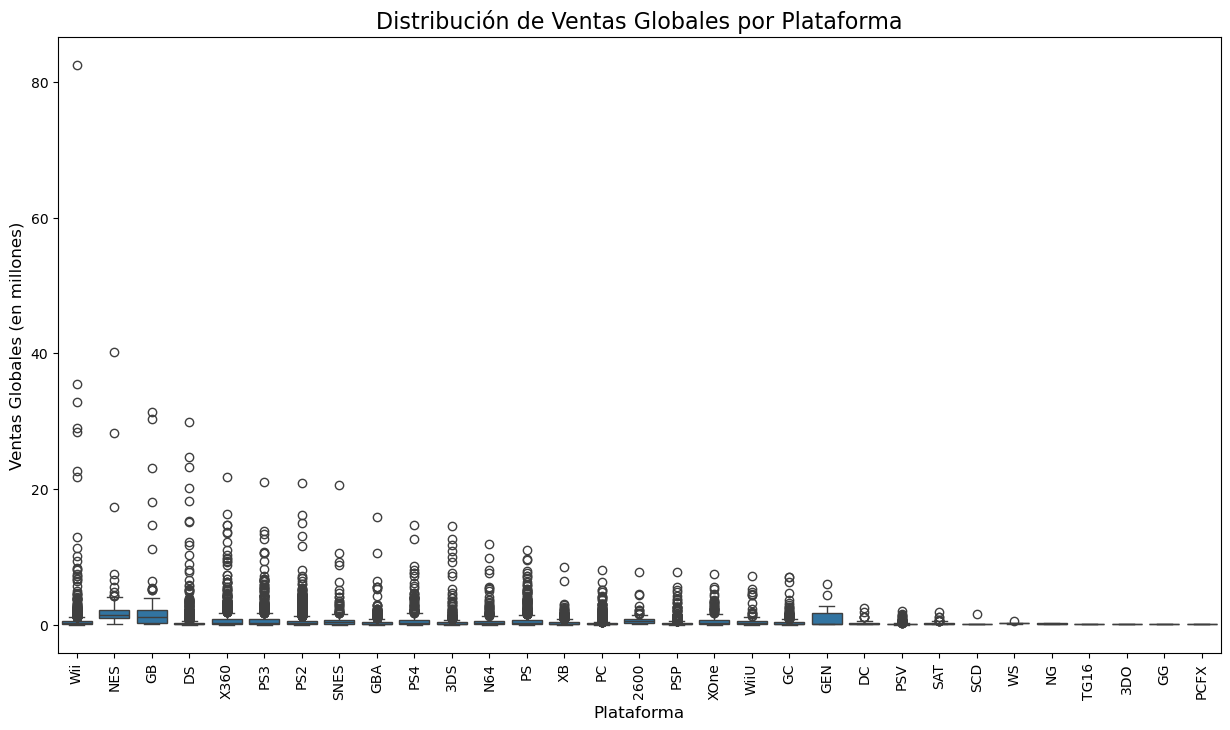

In [36]:
#ya importamos las librerias necesarias.
# Ajustamos el tamaño según sea necesario
plt.figure(figsize=(15, 8)) 
# Creamos el diagrama de caja
sns.boxplot(x='platform', y='total_sales', data=df)
# Añadimos títulos y etiquetas
plt.title('Distribución de Ventas Globales por Plataforma', fontsize=16)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Ventas Globales (en millones)', fontsize=12)
# Rotar las etiquetas del eje x para evitar superposición
plt.xticks(rotation=90)
# Mostrar el gráfico
plt.show()

Interpretación del Diagrama de Caja de Ventas Globales por Plataforma

### 1.¿Son significativas las diferencias en las ventas?
Sí, las diferencias en las ventas globales por plataforma son extremadamente significativas.

Varianza Extrema: Hay una diferencia abismal entre las plataformas en el extremo izquierdo (Wii, NES, GB, DS, X360, PS3, PS2) y las del extremo derecho (SCD, WS, NG, TG16, 3DO, GG, PCFX). Las plataformas de la izquierda muestran cajas y bigotes que, aunque pequeños en relación con los outliers, son visiblemente más altos que las cajas de las plataformas de la derecha, que están casi completamente achatadas en el eje cero.

Dominio de los Outliers: Para las plataformas más exitosas, la mayoría de las ventas globales están representadas por los puntos individuales (diamantes) que se extienden muy por encima de los "bigotes" de las cajas. Esto significa que la mayor parte de las ventas totales de una plataforma proviene de un número relativamente pequeño de juegos "blockbuster" (valores atípicos de ventas).
Por ejemplo, la Wii tiene un outlier que supera los 80 millones de unidades vendidas, mientras que la mediana (la línea dentro de la caja) está apenas por encima de 0.

### 2.¿Qué sucede con las ventas promedio en varias plataformas?
Medianas Extremadamente Bajas: Para la gran mayoría de las plataformas, la línea de la mediana (el centro de la caja) está muy, muy cerca de cero (o directamente en cero). Esto indica que:

La venta típica (mediana) de un juego en casi cualquier plataforma es muy baja, a menudo menos de 1 millón de unidades, e incluso mucho menos para las plataformas menos exitosas.
Para las plataformas como Wii, NES, GB, DS, X360, PS3, PS2, PS, GBA, etc., aunque tuvieron ventas globales totales masivas (como vimos en el análisis anterior), la mayoría de los juegos individuales lanzados en esas plataformas no fueron grandes éxitos de ventas. La cola de distribución es muy larga y pesada en el lado de las bajas ventas.
Pocas Plataformas con Medianas Visibles: Solo unas pocas plataformas en el extremo izquierdo (Wii, NES, GB, DS, X360, PS3, PS2) tienen una caja (y por lo tanto una mediana) que es visiblemente diferente de cero. Incluso para estas, la mediana sigue siendo relativamente baja cuando se compara con los valores máximos alcanzados por sus outliers.

### 3.Descripción de los Hallazgos
La industria de los videojuegos, tal como se refleja en este dataset, es un mercado de "ganadores absolutos". Pocos juegos venden decenas de millones de unidades, mientras que la gran mayoría de los títulos venden muy poco. Este patrón es consistente en casi todas las plataformas.
Dispersión de Ventas: Las plataformas con mayores ventas totales (Wii, PS2, X360, PS3, DS, etc.) también muestran la mayor dispersión en las ventas de sus juegos individuales. Sus cajas son más "altas" (aunque aún bajas en el gráfico) y tienen numerosos y altos valores atípicos, lo que sugiere que estas plataformas eran atractivas para desarrollar tanto grandes éxitos como una gran cantidad de títulos de nicho o de bajo rendimiento.
Plataformas de Nicho/Fracaso: Las plataformas en el extremo derecho del gráfico (como TG16, 3DO, GG, PCFX, etc.) tienen distribuciones de ventas extremadamente concentradas alrededor de cero. Sus cajas son prácticamente líneas, y casi no presentan outliers significativos, lo que indica que tuvieron muy pocos (o ningún) éxito de ventas y que la mayoría de sus juegos vendieron cifras insignificantes.
Importancia del "Hit": Para una plataforma, su éxito en ventas totales no depende de que la "venta promedio" de sus juegos sea alta, sino de que tenga una base de usuarios suficientemente grande para que unos pocos juegos se conviertan en fenómenos de ventas.
En resumen, el diagrama de caja subraya la naturaleza de "poder de la cola larga" de la industria de los videojuegos: muchos productos con bajas ventas, y unos pocos "super-éxitos" que dominan el panorama de ingresos. Las diferencias entre plataformas son abismales, principalmente impulsadas por la capacidad de una plataforma para generar (o atraer) estos títulos de ventas masivas.



### Diagramas de cajas indivuduales. Solo pondre las primeras tres para ejemplificar.  

Esto es para ver y entender como se generan los diagramas de caja de forma indivudual. 

### Consola Wii

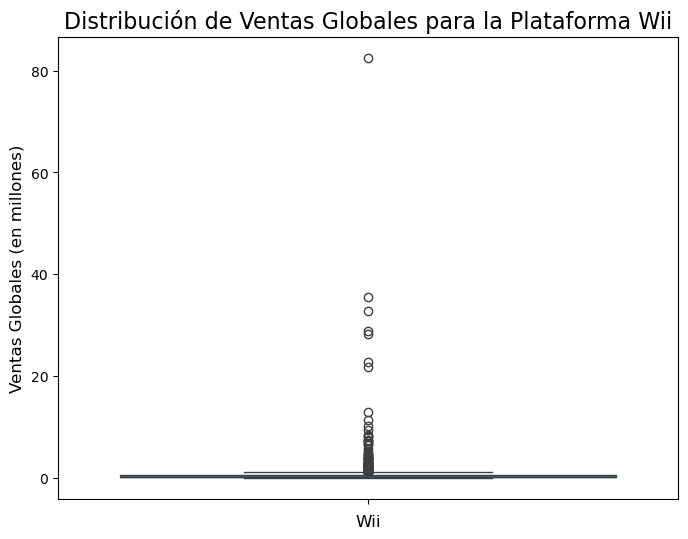

In [37]:
# Filtrar el DataFrame para obtener solo los datos de la plataforma 'Wii'
df_wii_sales = df[df['platform'] == 'Wii']
# Un tamaño más compacto para una sola plataforma
plt.figure(figsize=(8, 6)) # Un tamaño más compacto para una sola plataforma
# Crear el diagrama de caja para la Wii
sns.boxplot(y='total_sales', data=df_wii_sales) # Solo un eje X si es una sola categoría
# Añadir título y etiquetas
plt.title('Distribución de Ventas Globales para la Plataforma Wii', fontsize=16)
plt.ylabel('Ventas Globales (en millones)', fontsize=12)
plt.xlabel('Wii', fontsize=12) # Etiqueta el eje X explícitamente para la Wii
# Mostrar el gráfico
plt.show()

### Consola NES

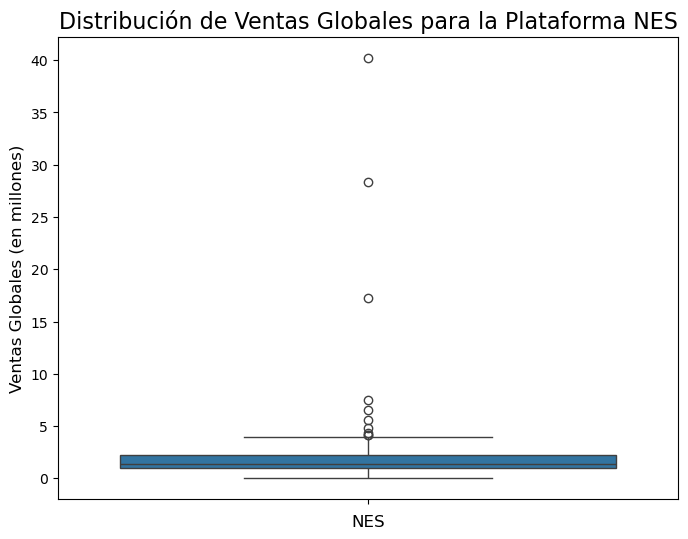

In [38]:
# Filtrar el DataFrame para obtener solo los datos de la plataforma 'NES'
df_nes_sales = df[df['platform'] == 'NES']
# Un tamaño más compacto para una sola plataforma
plt.figure(figsize=(8, 6)) # Un tamaño más compacto para una sola plataforma
# Crear el diagrama de caja para la Wii
sns.boxplot(y='total_sales', data=df_nes_sales) # Solo un eje X si es una sola categoría
# Añadir título y etiquetas
plt.title('Distribución de Ventas Globales para la Plataforma NES', fontsize=16)
plt.ylabel('Ventas Globales (en millones)', fontsize=12)
plt.xlabel('NES', fontsize=12) # Etiqueta el eje X explícitamente para la Wii
# Mostrar el gráfico
plt.show()

### Consola GB

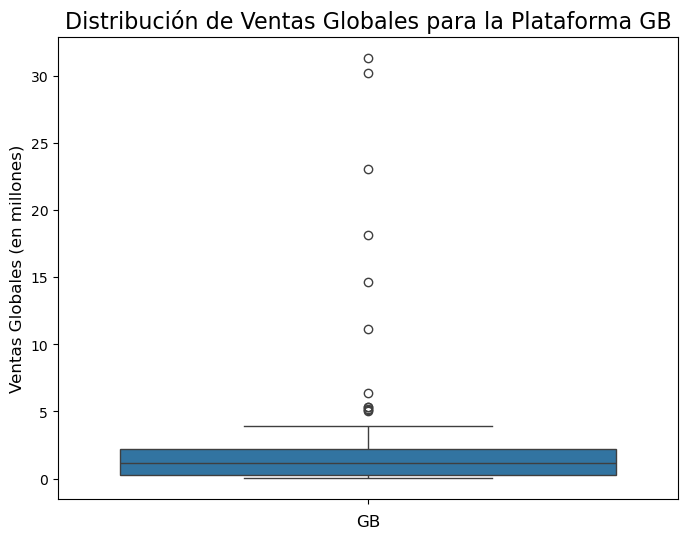

In [39]:
# Filtrar el DataFrame para obtener solo los datos de la plataforma 'GB'
df_gb_sales = df[df['platform'] == 'GB']
# Un tamaño más compacto para una sola plataforma
plt.figure(figsize=(8, 6)) # Un tamaño más compacto para una sola plataforma
# Crear el diagrama de caja para la Wii
sns.boxplot(y='total_sales', data=df_gb_sales) # Solo un eje X si es una sola categoría
# Añadir título y etiquetas
plt.title('Distribución de Ventas Globales para la Plataforma GB', fontsize=16)
plt.ylabel('Ventas Globales (en millones)', fontsize=12)
plt.xlabel('GB', fontsize=12) # Etiqueta el eje X explícitamente para la Wii
# Mostrar el gráfico
plt.show()

### En resumen
La "pequeña" caja de estas tres primeras consolas, es precisamente lo que nos dice la historia de las ventas de la Wii, NES y GB a nivel de juego individual: la mayoría de los juegos no vendieron mucho, pero los pocos que lo hicieron, vendieron una barbaridad.

+ ## Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección).
+ ## Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas.
+ ## Saca conclusiones.

Análisis de la Influencia de Reseñas en las Ventas para una Plataforma Popular
Basado en nuestro análisis de ventas totales y ciclos de vida, la PS4 es una excelente candidata para este análisis porque es una plataforma popular que está activa al final de nuestro dataset, lo que significa que sus dinámicas de ventas son más relevantes para el mercado actual.

Vamos a realizar los siguientes pasos:
+ Filtrar los datos para la plataforma PS4.
+ Crear gráficos de dispersión para critic_score vs total_sales y user_score vs total_sales.
+ Calcular la correlación entre las puntuaciones y las ventas.
+ Sacar conclusiones de los hallazgos.

Analizando la influencia de las reseñas en las ventas para la plataforma: PS4
Número de juegos en PS4: 392
****************************************************************************************************


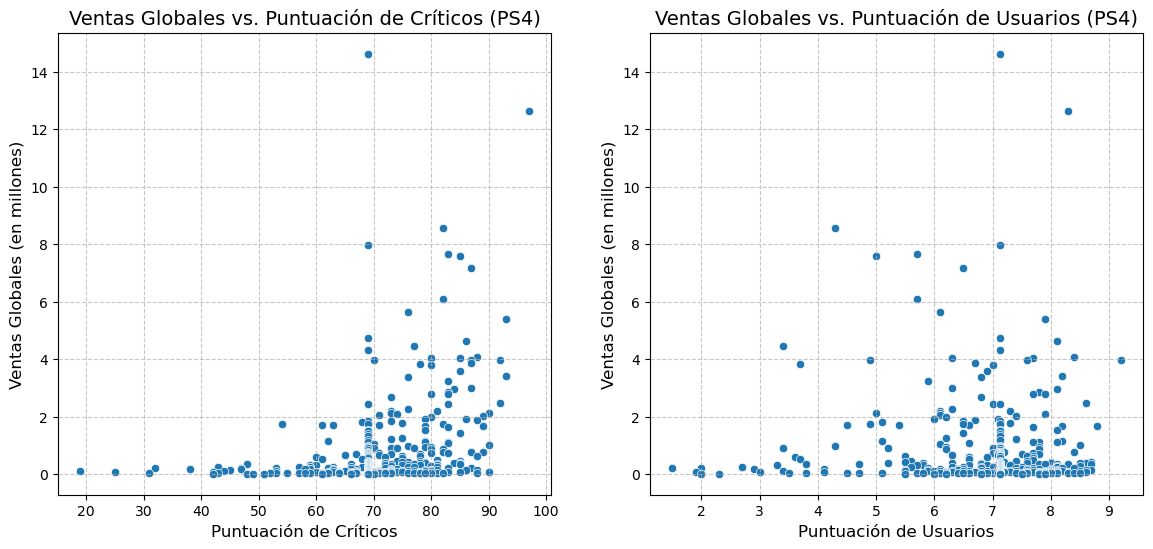

****************************************************************************************************
Correlación de Pearson para PS4:
Ventas Globales y Puntuación de Críticos: 0.35
Ventas Globales y Puntuación de Usuarios: -0.05


In [40]:
#Paso 1: Filtrar el DataFrame para la plataforma PS4 
platform_to_analyze = 'PS4'
df_platform = df[df['platform'] == platform_to_analyze].copy()
print(f"Analizando la influencia de las reseñas en las ventas para la plataforma: {platform_to_analyze}")
print(f"Número de juegos en PS4: {len(df_platform)}")
print("*"*100)

#Paso 2: Crear Gráficos de Dispersión 
#Gráfico de dispersión para Critic Score vs Total Sales
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1) # 1 fila, 2 columnas, primer gráfico
sns.scatterplot(x='critic_score', y='total_sales', data=df_platform)
plt.title(f'Ventas Globales vs. Puntuación de Críticos ({platform_to_analyze})', fontsize=14)
plt.xlabel('Puntuación de Críticos', fontsize=12)
plt.ylabel('Ventas Globales (en millones)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Gráfico de dispersión para User Score vs Total Sales
plt.subplot(1, 2, 2) # 1 fila, 2 columnas, segundo gráfico
sns.scatterplot(x='user_score', y='total_sales', data=df_platform)
plt.title(f'Ventas Globales vs. Puntuación de Usuarios ({platform_to_analyze})', fontsize=14)
plt.xlabel('Puntuación de Usuarios', fontsize=12)
plt.ylabel('Ventas Globales (en millones)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#Paso 3: Calcular la Correlación 

# Calculamos la correlación entre las reseñas y la ventas
# Es importante recordar que rellenamos los NaNs con la media.
# Esto puede afectar la correlación. Si los NaNs originales fueran removidos
# antes del cálculo de correlación, sería más "pura" respecto a los que sí tienen scores.
# Pero dado que ya los imputamos, calculamos con los valores actuales.

correlation_critic = df_platform['critic_score'].corr(df_platform['total_sales'])
correlation_user = df_platform['user_score'].corr(df_platform['total_sales'])

print("*"*100)
print(f"Correlación de Pearson para {platform_to_analyze}:")
print(f"Ventas Globales y Puntuación de Críticos: {correlation_critic:.2f}")
print(f"Ventas Globales y Puntuación de Usuarios: {correlation_user:.2f}")


### Conclusiones:

1. Gráfico de Dispersión: Ventas Globales vs. Puntuación de Críticos (PS4) Primer Gráfica.
Tendencia Positiva Débil a Moderada: Observamos una nube de puntos que sugiere una tendencia positiva. A medida que la puntuación de los críticos aumenta (moviéndose hacia la derecha en el eje X), hay una mayor probabilidad de ver juegos con ventas más altas (puntos que suben en el eje Y). No es una correlación perfecta, pero la "nube" se eleva.
Concentración en Puntuaciones Altas: La mayoría de los juegos con ventas significativas se agrupan en el rango de puntuaciones de críticos de 70 a 90+. Esto indica que los críticos suelen dar buenas puntuaciones a los juegos que venden bien.
Outliers: Los juegos con ventas más altas (los puntos más altos en el eje Y, como el que supera los 12 millones) generalmente tienen puntuaciones de críticos decentes o altas (por encima de 70). Esto sugiere que para que un juego sea un gran éxito de ventas, es muy probable que necesite una crítica favorable.
Base de Juegos de Puntuación Baja/Venta Baja: Hay una gran concentración de puntos en la parte inferior izquierda del gráfico (ventas bajas, puntuaciones bajas a moderadas), lo que significa que muchos juegos reciben puntuaciones medianas o bajas y no venden mucho.

2.  Gráfico de Dispersión: Ventas Globales vs. Puntuación de Usuarios (PS4) Segunda Gráfica.
Tendencia Débil o Casi Nula: Este gráfico muestra una dispersión mucho mayor y una tendencia mucho menos clara que el de los críticos. Los puntos están más esparcidos y no parece haber una clara inclinación ascendente a medida que la puntuación de los usuarios aumenta.
Menos Sensibilidad a Puntuaciones Extremas: Juegos con ventas muy altas (los mismos outliers que vimos con los críticos) tienen una gama más amplia de puntuaciones de usuarios. Pueden tener puntuaciones de usuarios muy altas, pero también medias o incluso bajas, y aún así vender mucho. Esto podría deberse a la base de fans, el reconocimiento de la marca o la naturaleza de un juego que apela a un público masivo, pero no necesariamente a todos los usuarios que escriben reseñas.
Dispersión en Puntuaciones Bajas: Hay una cantidad considerable de juegos con ventas bajas distribuidos a lo largo de todo el espectro de puntuaciones de usuarios.

3. Coeficientes de Correlación:
Ventas Globales y Puntuación de Críticos: 0.35
Este valor de 0.35 indica una correlación positiva moderada, significa que existe una relación a medida que la puntuación de los críticos aumenta, las ventas globales tienden a aumentar. Los críticos pueden influir en la percepción inicial y la decisión de compra, especialmente para los juegos que buscan atraer a un público más amplio y generar un "boca a boca" positivo. Un juego con una mala crítica es menos probable que venda bien.

4. Ventas Globales y Puntuación de Usuarios: -0.05
Este valor de -0.05 indica una correlación casi nula, significa que para la plataforma PS4, las puntuaciones de los usuarios tienen una influencia lineal mínima o prácticamente inexistente en las ventas globales. Esto es un hallazgo interesante. Sugiere que el gusto del usuario promedio que compra el juego no se alinea necesariamente con las puntuaciones que dejan los usuarios en sitios de reseñas, o que otros factores (como la popularidad de la franquicia, el marketing) pesan más que la opinión de los usuarios que se toman el tiempo de puntuar el juego.
Podría haber múltiples razones para esto:
Los usuarios que puntúan son un subconjunto de todos los compradores, quizás más críticos.
Los juegos muy populares pueden ser con muchos fans pero también muchos que los critican.
Las ventas ya están impulsadas por el marketing antes de que se acumulen suficientes puntuaciones de usuario.

### Conclusiones Generales:
Los críticos importan (al menos moderadamente): En la PS4, una buena puntuación de los críticos parece ser un factor que contribuye al éxito en ventas, aunque no es el único ni el más fuerte. Parece haber un umbral mínimo de calidad percibida (a través de los críticos) que los juegos exitosos tienden a cumplir.
La opinión del usuario (en forma de puntuación numérica) es menos un motor de ventas directo: No hay una relación lineal clara entre lo que un juego "promedia" en las puntuaciones de los usuarios y lo bien que vende. Otros factores probablemente tienen un peso mucho mayor en las decisiones de compra del público general. Esto no significa que la opinión del usuario no importe en absoluto, sino que su expresión numérica agregada en plataformas de reseñas tiene una correlación lineal débil con las ventas.

+ ## Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

Esto nos ayudará a entender si el éxito de un juego es transferible entre consolas o si ciertas plataformas favorecen más a ciertos títulos.

Comparación de Ventas de los Mismos Juegos en Diferentes Plataformas
Para llevar a cabo este análisis, necesitamos identificar los juegos que se lanzaron en múltiples plataformas. Luego, podemos comparar sus ventas en cada una de esas plataformas.
1. Identificar Juegos Multiplataforma
Necesitamos encontrar los "name" de los juegos que aparecen con más de una platform.

In [41]:
# Contar cuántas plataformas tiene cada juego (por nombre)
game_platform_counts = df.groupby('name')['platform'].nunique()
# Filtrar para obtener solo los nombres de juegos que aparecen en más de una plataforma
multiplatform_games_names = game_platform_counts[game_platform_counts > 1].index.tolist()

print(f"Número de juegos multiplataforma identificados: {len(multiplatform_games_names)}")
print("Ejemplos de juegos multiplataforma:")
print(multiplatform_games_names[:10]) # Mostrar los primeros 10 para ejemplo

# Filtrar el DataFrame original para solo incluir estos juegos multiplataforma
df_multiplatform = df[df['name'].isin(multiplatform_games_names)].copy()

print("\nInformación del DataFrame de juegos multiplataforma:")
print(df_multiplatform.info())

Número de juegos multiplataforma identificados: 2748
Ejemplos de juegos multiplataforma:
['007: Quantum of Solace', '007: The World is not Enough', '11eyes: CrossOver', '18 Wheeler: American Pro Trucker', '187: Ride or Die', '2 in 1 Combo Pack: Sonic Heroes / Super Monkey Ball Deluxe', '2002 FIFA World Cup', '2010 FIFA World Cup South Africa', '2014 FIFA World Cup Brazil', '25 to Life']

Información del DataFrame de juegos multiplataforma:
<class 'pandas.core.frame.DataFrame'>
Index: 7766 entries, 1 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             7766 non-null   object        
 1   platform         7766 non-null   object        
 2   year_of_release  7766 non-null   datetime64[ns]
 3   genre            7766 non-null   object        
 4   na_sales         7766 non-null   float64       
 5   eu_sales         7766 non-null   float64       
 6   jp_sales         7766 no

2. Analizar las Ventas por Plataforma para los Juegos Seleccionados
Ahora que tenemos nuestros dataframe filtrado "df_multiplatform", podemos elegir algunos juegos de esa lista y ver sus ventas en cada plataforma en la que fueron lanzados. Es difícil visualizar todos los juegos multiplataforma de una vez ya que son 7766 entradas, son muchos, así que elegiremos algunos ejemplos representativos o los más vendidos para una visualización.

Elijamos un juego popular que sabemos que fue multiplataforma, como "Grand Theft Auto V" o "Call of Duty: Black Ops II" pero podemos elegir cualquiera de multiplatform_games_names que nos interese).

In [42]:
#con este codigo podemos ver todos los juegos, pero no lo imprimamos, son muchos. 
#print(multiplatform_games_names)


Ventas de 'Grand Theft Auto V' por plataforma:
     platform  year  total_sales  critic_score  user_score
16        PS3  2013        21.05          97.0         8.2
23       X360  2013        16.27          97.0         8.1
42        PS4  2014        12.62          97.0         8.3
165      XOne  2014         5.47          97.0         7.9
1730       PC  2015         1.17          96.0         7.9


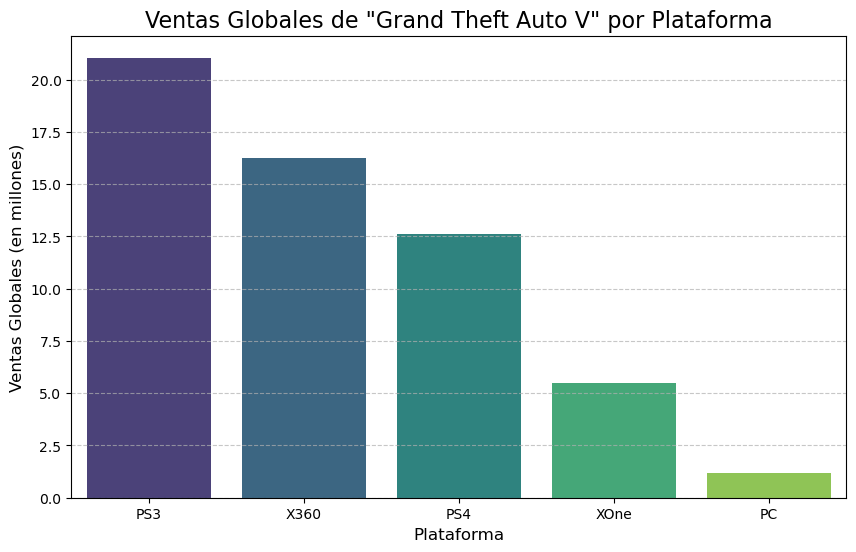

In [43]:
# Elegir un juego multiplataforma para analizar sus ventas por plataforma
# Puedemos reemplazar 'Grand Theft Auto V' con otro juego de multiplatform_games_names
game_to_compare = 'Grand Theft Auto V'

# Filtrar el DataFrame para obtener solo las entradas de este juego
game_versions = df_multiplatform[df_multiplatform['name'] == game_to_compare]

print(f"\nVentas de '{game_to_compare}' por plataforma:")
print(game_versions[['platform', 'year', 'total_sales', 'critic_score', 'user_score']])

# Visualización (una grafica extra para saber en que plataforma se vendio más el videojuego)
if not game_versions.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='platform', y='total_sales', data=game_versions, palette='viridis', hue='platform', legend=False)
    plt.title(f'Ventas Globales de "{game_to_compare}" por Plataforma', fontsize=16)
    plt.xlabel('Plataforma', fontsize=12)
    plt.ylabel('Ventas Globales (en millones)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

### Análisis de la Grafica/Datos

1. PS3 (21.05 millones) y X360 (16.27 millones) son las plataformas dominantes en ventas para GTA V.
Implicación: GTA V fue lanzado inicialmente en PS3 y Xbox 360 en 2013. En ese momento, estas plataformas tenían una base instalada de usuarios gigantesca y madura. La gran mayoría de los jugadores que querían el juego lo compraron en estas consolas, lo que explica sus enormes cifras de ventas.Esto resalta la importancia de la base de usuarios existente en el momento del lanzamiento de un juego para sus ventas iniciales.

2. Rendimiento Fuerte en la Nueva Generación, Pero Menor Que el Inicial
PS4 (12.62 millones) y XOne (5.47 millones) también muestran ventas considerables, aunque inferiores a las de la generación anterior.
Implicación: GTA V fue relanzado para PS4 y Xbox One en 2014, cuando estas consolas eran aún relativamente nuevas y estaban construyendo su base de usuarios. Las ventas demuestran que, a pesar de una base instalada menor al principio, hubo un número significativo de jugadores que "recompraron" el juego para la nueva generación por las mejoras gráficas y de rendimiento, o que simplemente esperaron su lanzamiento en la nueva consola.
La diferencia entre PS4 y XOne en este relanzamiento también podría reflejar la ventaja inicial de la PS4 en la cuota de mercado en esa generación.

3. Rendimiento en PC: Sólido, pero el Más Bajo Entre Consolas
PC (1.17 millones) tiene las ventas más bajas entre todas las versiones de consola mostradas.
Implicación: El lanzamiento en PC fue en 2015, más tarde que en consolas. Si bien 1.17 millones es una cifra respetable, es significativamente menor que las ventas en consolas. Esto puede deberse a varios factores:
Base de jugadores: Aunque el PC gaming es grande, los jugadores que preferían consolas ya lo habían comprado.
Piratería: Históricamente, la piratería ha sido un factor más prevalente en PC, aunque GTA V implementó fuertes medidas DRM.
Momento del lanzamiento: Al ser el último en lanzarse, muchos ya habían experimentado el juego.
Modelo de negocio: Los ingresos de PC a menudo incluyen fuertes ventas digitales y compras in-game que podrían no estar totalmente reflejadas en las "ventas de unidades" en datasets como este.

4. Consistencia de la Crítica vs. Variabilidad del Usuario
critic_score es consistentemente alto (96-97) en todas las plataformas.
Implicación: Esto sugiere que la calidad fundamental del juego fue universalmente reconocida por los críticos, independientemente de la plataforma. El port fue bien recibido en todas las consolas y PC. Esto refuerza la idea de que una buena crítica es un prerrequisito para un gran éxito.

5. user_score varía ligeramente (7.9 a 8.3).
Implicación: Aunque la variación es pequeña, muestra que la percepción del usuario puede tener matices por plataforma, pero en general fue muy positiva. La ligera variación no parece correlacionar directamente con las enormes diferencias en ventas.


### Conclusiones Generales del Juego Multiplataforma:
El éxito inicial y masivo de un juego multiplataforma depende en gran medida de la base de usuarios de las plataformas dominantes en el momento de su lanzamiento principal.
Valor del "Doble Salto Generacional": Relanzar un juego exitoso en la siguiente generación de consolas puede generar millones de ventas adicionales, incluso si no iguala el volumen del lanzamiento original.
PC como Mercado Diferente: El PC es un mercado con dinámicas propias. Los juegos pueden vender bien, pero no siempre alcanzan las cifras de las consolas en el mismo grado, a menudo debido a factores como el momento del lanzamiento, la piratería y la diferente naturaleza de cómo los jugadores de PC consumen contenido.
Calidad Universal: Para un mega-éxito como GTA V, la calidad percibida por los críticos es consistente y alta en todas las versiones, lo que subraya la importancia de un producto fundamentalmente sólido.

### otro ejemplo:


Ventas de 'Frozen: Olaf's Quest' por plataforma:
     platform  year  total_sales  critic_score  user_score
3358      3DS  2013         0.59     68.994363     7.12633
3862       DS  2013         0.51     68.994363     7.12633


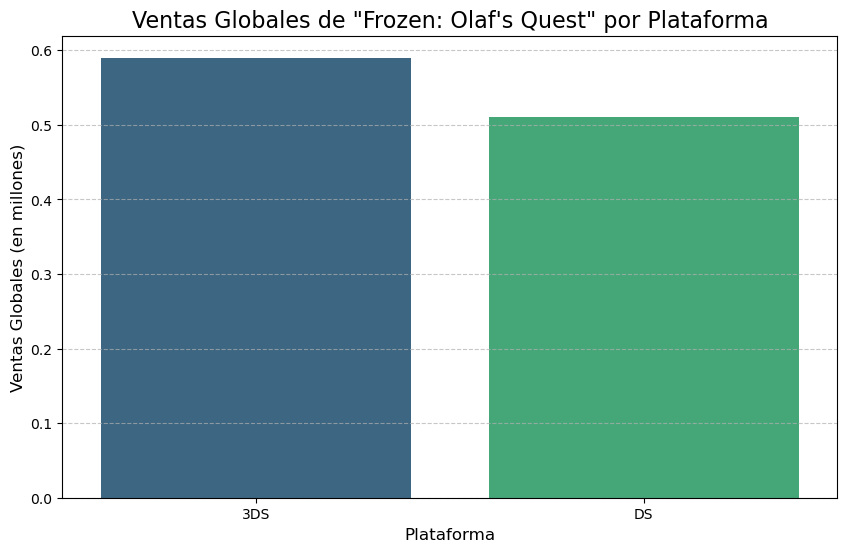

In [44]:
game_to_compare = "Frozen: Olaf's Quest"

game_versions = df_multiplatform[df_multiplatform['name'] == game_to_compare]
print(f"\nVentas de '{game_to_compare}' por plataforma:")
print(game_versions[['platform', 'year', 'total_sales', 'critic_score', 'user_score']])

if not game_versions.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='platform', y='total_sales', data=game_versions, palette='viridis', hue='platform', legend=False)
    plt.title(f'Ventas Globales de "{game_to_compare}" por Plataforma', fontsize=16)
    plt.xlabel('Plataforma', fontsize=12)
    plt.ylabel('Ventas Globales (en millones)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

### Análisis de la Grafica/Datos

1. Ventas Totales Bajas: Las ventas globales de "Frozen: Olaf's Quest" en ambas plataformas (3DS: 0.59 millones, DS: 0.51 millones) son significativamente bajas en comparación con las decenas de millones de "Grand Theft Auto V".
Implicación: Esto demuestra que no todos los juegos multiplataforma son grandes éxitos. Este es un ejemplo de un juego más de nicho o de menor presupuesto/alcance, a pesar de estar basado en una popular franquicia de medios.

2. Rendimiento Consistente entre Plataformas Similares
Ventas Similares en 3DS y DS: Las ventas son muy parecidas en ambas plataformas portátiles de Nintendo, con una ligera ventaja para la 3DS.
Implicación: Esto sugiere que, para juegos de este perfil (posiblemente dirigidos a un público infantil o casual, y en consolas portátiles de la misma compañía), la elección de la plataforma entre la 3DS (más nueva) y la DS (más antigua pero con mayor base instalada histórica) no resultó en una diferencia drástica en ventas de unidades. El tipo de juego y el atractivo de la franquicia pueden ser más importantes que la consola específica, especialmente si ambas eran accesibles para el público objetivo.

3. Lanzamiento en Plataformas de la Misma Compañía y Generación Superpuesta
Ambos lanzamientos fueron en 2013: Esto es crucial. En 2013, la 3DS ya estaba establecida como la consola portátil actual de Nintendo, pero la DS todavía tenía una base de usuarios enorme y activa, y los juegos se seguían lanzando para ella.
Implicación: Indica una estrategia de "lanzamiento cruzado" entre generaciones cercanas o solapadas dentro de la misma compañía. Desarrollar un juego para ambas permitía maximizar el alcance al público objetivo que poseía cualquiera de las dos consolas, aprovechando tanto la base instalada masiva de la DS como la creciente base de la 3DS.

4. Reseñas y su Correlación con Ventas
Puntuaciones de Críticos y Usuarios Idénticas: Ambas versiones tienen un critic_score de 68.99 y un user_score de 7.12. (Es muy probable que sea el mismo juego base con un port directo, y las reseñas se aplican a ambas versiones o son casi idénticas).
Implicación: Con puntuaciones tan similares y ventas tan cercanas, este ejemplo no nos ayuda mucho a dilucidar la correlación entre reseñas y ventas o cómo difiere entre plataformas. Sin embargo, sí refuerza la idea de que juegos con puntuaciones "medias" (ni muy buenas ni muy malas) pueden tener ventas moderadas, no necesariamente grandes éxitos. El marketing de la franquicia "Frozen" probablemente jugó un papel más importante que las reseñas para este juego.


### Conclusiones Generales del Juego "Frozen: Olaf's Quest":
Diversidad en el Mercado Multiplataforma: No todos los juegos multiplataforma son "Grand Theft Auto V". Este ejemplo muestra el lado de los juegos con ventas más modestas, que aún buscan maximizar su alcance en plataformas con audiencias superpuestas.
Segmentación del Mercado: Es probable que "Frozen: Olaf's Quest" estuviera dirigido a un segmento de mercado específico (familias, niños pequeños) donde la popularidad de la franquicia de medios supera la necesidad de puntuaciones de juego estelares para impulsar ventas modestas.
Optimización de Alcance: Lanzar el juego simultáneamente en 3DS y DS fue una estrategia para cubrir la mayor cuota posible del mercado de consolas portátiles de Nintendo, dado el perfil del juego.
+ Este segundo ejemplo nos da una perspectiva más matizada del mercado multiplataforma, mostrando que hay muchos factores más allá de la mera "calidad de la crítica" que influyen en las ventas, y que la estrategia de lanzamiento multiplataforma puede variar enormemente según el tipo de juego y su público objetivo.

## ALTO: 
antes de seguir con el análisis, acabo de descubrir algo demasiado importante que no me di cuenta en el procesamiento de los datos, (game_to_compare = " Frozen: Olaf's Quest") ¿que podemos observa aquí?, TENEMOS ESPACIOS EXTRA en el título del juego por ende debemos revisar la columna "name". 
Obviamente en mi porcesamiento de datos vamos a corregir esto. 

+ ## Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

Análisis de la Distribución General de Juegos por Género y su Rentabilidad
vamos a realizar los siguientes pasos:

Calcular las ventas totales por género para identificar los más rentables.
Contar el número de juegos por género para ver la distribución de lanzamientos.
Generar un diagrama de caja de ventas por género para entender la distribución y la rentabilidad promedio.
Sacar conclusiones sobre los géneros más rentables y generalizar sobre ventas altas y bajas.

Ventas totales por género:
genre
Action          1716.52
Sports          1309.67
Shooter         1041.36
Role-Playing     931.08
Platform         825.55
Misc             790.29
Racing           723.49
Fighting         442.66
Simulation       387.96
Puzzle           239.89
Adventure        233.33
Strategy         172.57
Name: total_sales, dtype: float64

Número de juegos por género:
genre
Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: count, dtype: int64


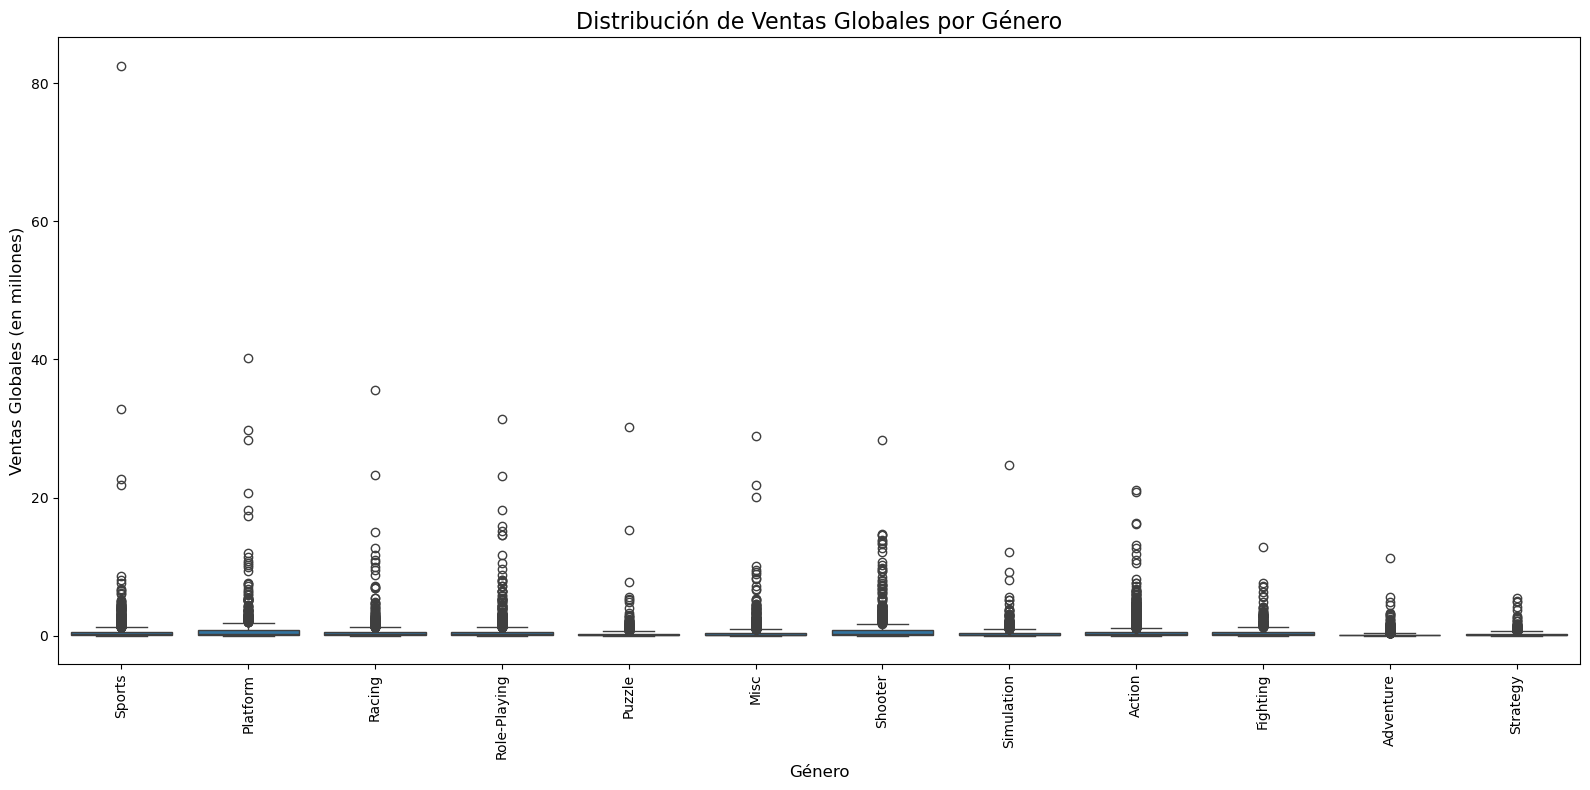

In [45]:
#Ventas Totales por Género 
genre_total_sales = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print("Ventas totales por género:")
print(genre_total_sales)

#2. Número de Juegos por Género
genre_game_counts = df['genre'].value_counts()
print("\nNúmero de juegos por género:")
print(genre_game_counts)

#3. Diagrama de Caja de Ventas por Género
# Configurar el tamaño de la figura para que el gráfico sea legible
plt.figure(figsize=(16, 8)) # Un tamaño más grande para acomodar todos los géneros
# Crear el diagrama de caja
sns.boxplot(x='genre', y='total_sales', data=df)
# Añadir título y etiquetas
plt.title('Distribución de Ventas Globales por Género', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Ventas Globales (en millones)', fontsize=12)
# Rotar las etiquetas del eje x para evitar superposición
plt.xticks(rotation=90,) # Rotar
plt.tight_layout() # Ajusta automáticamente los parámetros del subplot
plt.show()

Aqui muestro la misma gráfica pero ajustando el límite superior del eje Y para una mejor visualización de la mayoría de las cajas
plt.ylim(0, 10) para tener una mejor viasualizacion, ya que las cajas se ven todas comprimidas. 

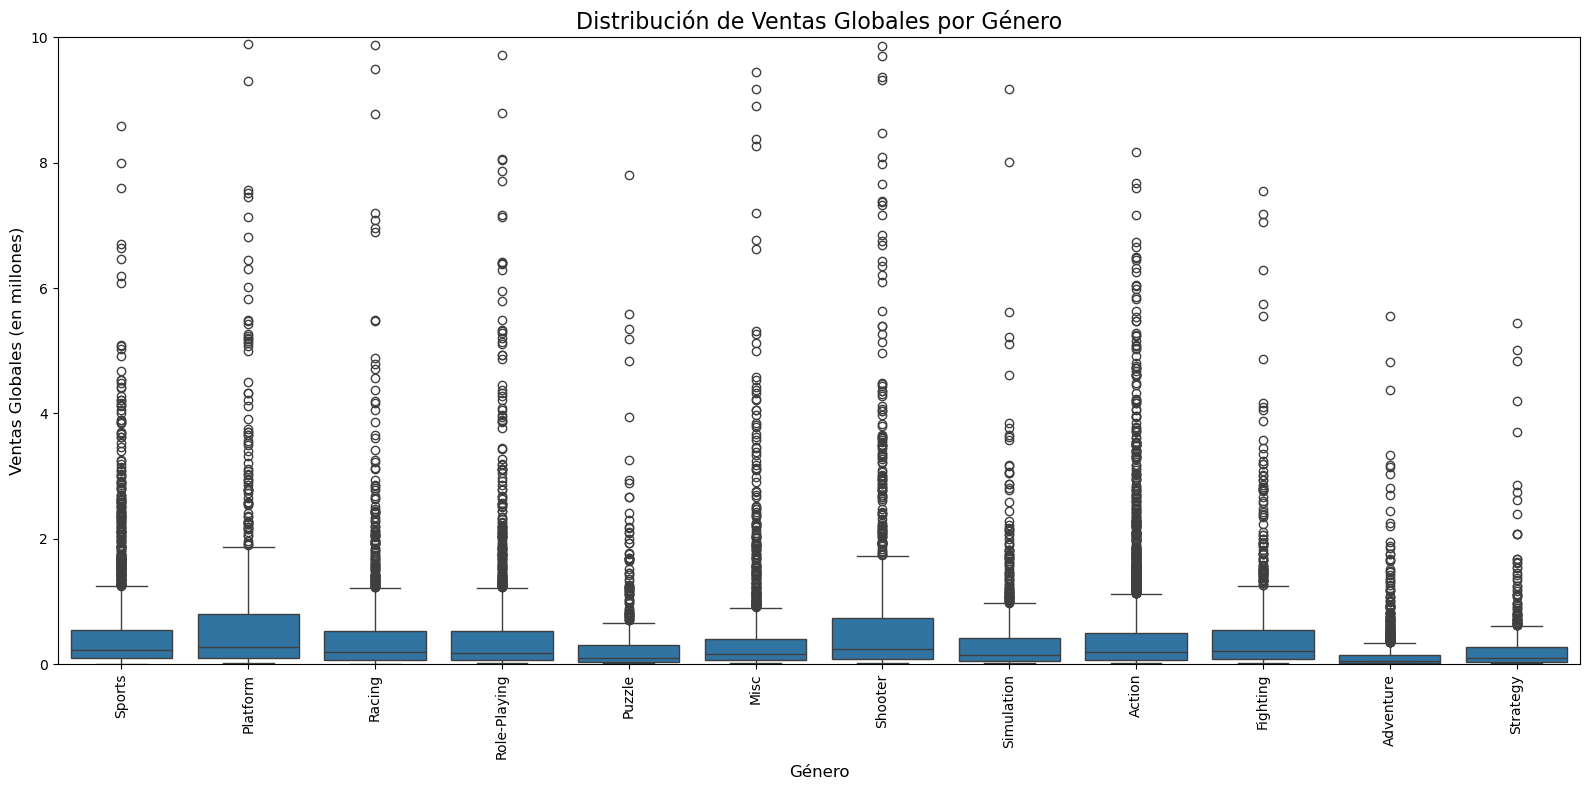

In [46]:
plt.figure(figsize=(16, 8))

sns.boxplot(x='genre', y='total_sales', data=df)

plt.title('Distribución de Ventas Globales por Género', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Ventas Globales (en millones)', fontsize=12)
plt.ylim(0, 10)
plt.xticks(rotation=90) 
plt.tight_layout() 
plt.show()

### Conclusiones:

1. Ventas Totales por Género: ¿Qué se puede decir de los géneros más rentables?
Géneros Dominantes en Ingresos: Los géneros Action (Acción), Sports (Deportes) y Shooter (Disparos) son, por mucho, los más rentables en términos de ventas globales totales. Estos tres géneros acumulan una parte muy significativa de los ingresos de toda la industria en este dataset.
Otros Géneros Fuertes: Role-Playing (Juegos de Rol), Platform (Plataformas) y Misc (Misceláneos) también muestran un rendimiento de ventas muy sólido, estando en el siguiente nivel de rentabilidad.
Géneros de Menor Ingreso: Puzzle, Adventure (Aventura) y Strategy (Estrategia) se encuentran en la parte inferior de la lista en cuanto a ventas totales acumuladas.

2. Número de Juegos por Género:
Producción y Ventas: Hay una correlación evidente entre el número de lanzamientos y las ventas totales. Los géneros con más juegos lanzados (Action, Sports) son también los que generan más ingresos. Esto sugiere que los desarrolladores invierten más en géneros que ya han demostrado ser rentables o tener una gran demanda.
Aventura vs. Shooter: Curiosamente, Adventure tiene un número similar de juegos lanzados que Shooter (1293 vs 1296), pero las ventas totales de Shooter son más de 4 veces mayores (1041.36M vs 233.33M). Esto indica que, aunque se lancen muchos juegos de Aventura, los juegos de Shooter tienen un potencial de ventas por título mucho mayor, lo que los hace más rentables individualmente.
Misceláneos: Tiene un alto volumen de juegos y ventas decentes, lo que sugiere que es una categoría amplia que puede capturar una variedad de éxitos.

3. Diagrama de Caja de Ventas Globales por Género:
y respondiendo a la pregunta ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?
El diagrama de caja es crucial para entender la distribución de ventas dentro de cada género, no solo los totales:

### Géneros con Ventas Altas:

+ Características: Géneros como Sports, Platform, Racing, Role-Playing, Shooter, Action, Fighting, Simulation tienen numerosos y altos valores atípicos (outliers) que se extienden muy por encima de las cajas y los bigotes.
Generalización: Estos son los géneros que tienen la capacidad de producir "mega-hits" (juegos que venden decenas de millones de unidades). La mayor parte de la rentabilidad total de estos géneros se debe a estos pocos títulos excepcionalmente exitosos.
Medianas Bajas: Sin embargo, la mediana (la línea dentro de la caja) para casi todos estos géneros sigue siendo muy baja (cerca de cero). Esto reitera que, incluso en los géneros más rentables, la mayoría de los juegos no son grandes éxitos; un gran volumen de juegos vende poco, pero los pocos que lo hacen, venden masivamente.
Géneros con Ventas Bajas:

+ Características: Géneros como Puzzle, Adventure y Strategy tienen cajas muy compactas y cercanas a cero, y muchos menos (o ningún) outlier alto en comparación con los géneros de ventas altas. Cuando hay outliers, son significativamente más bajos en escala.
Generalización: Estos géneros, en general, no producen la misma cantidad o magnitud de hits. La mayoría de sus títulos venden cifras modestas, y aunque pueden ser apreciados por sus nichos de mercado, no tienen el mismo atractivo de ventas masivas que los géneros Action o Shooter. Los ingresos totales más bajos para estos géneros son un reflejo de que la base de sus juegos individuales no es tan lucrativa.

### Conclusiones Globales:
La Industria del "Hit" Domina: El patrón de la "cola larga" que vimos a nivel de plataforma se repite y se acentúa a nivel de género. Un puñado de géneros (principalmente Acción, Deportes, Shooter) y, dentro de ellos, un puñado de títulos, son los que impulsan la mayor parte de los ingresos de la industria.
Estrategia de Desarrollo: Para un estudio o editor que busca maximizar ingresos, invertir en géneros como Action, Shooter, Sports o Role-Playing ofrece el mayor potencial para un "hit" masivo, aunque también implica el riesgo de que la mayoría de sus lanzamientos vendan poco.
Géneros de Nicho vs. Masivos: Géneros como Puzzle, Adventure y Strategy tienen un atractivo más de nicho, lo que se traduce en ventas totales y ventas promedio por juego significativamente menores.



# Paso 4. Crea un perfil de usuario para cada región
### Para cada región (NA, UE, JP) determina:

Vamos a abordar cada punto sistemáticamente para las regiones de Norteamérica (NA), Europa (EU) y Japón (JP).
Para cada región (NA, UE, JP) determina:

## 1. Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
Para cada región, calcularemos las ventas totales por plataforma y luego seleccionaremos las cinco principales.

--- Análisis de las Cinco Plataformas Principales por Región ---

Top 5 Plataformas en NA:
platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64


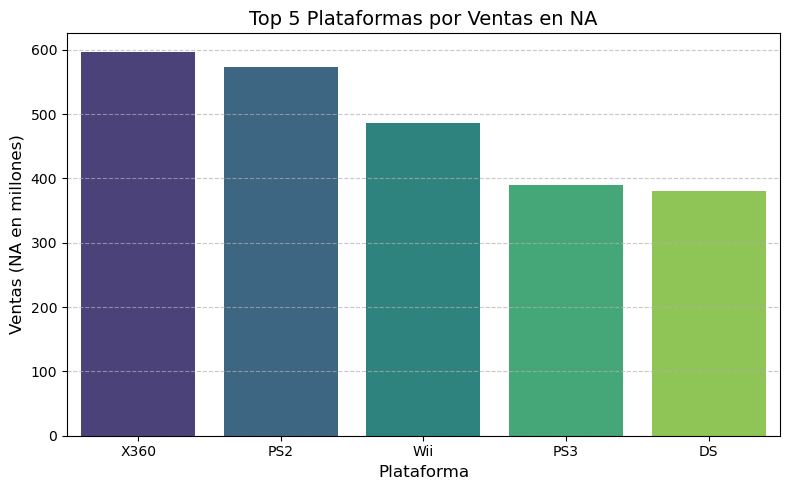


Top 5 Plataformas en EU:
platform
PS2     332.63
PS3     327.21
X360    268.32
Wii     258.32
PS      212.39
Name: eu_sales, dtype: float64


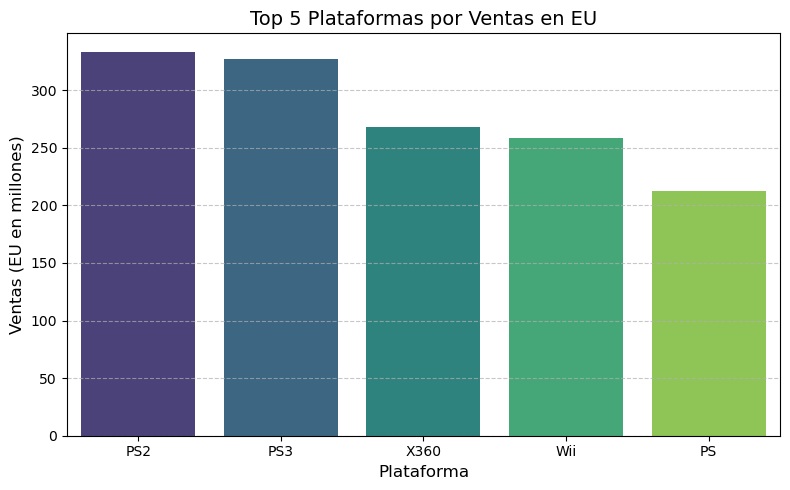


Top 5 Plataformas en JP:
platform
DS      175.02
PS      139.78
PS2     137.54
SNES    116.55
3DS     100.62
Name: jp_sales, dtype: float64


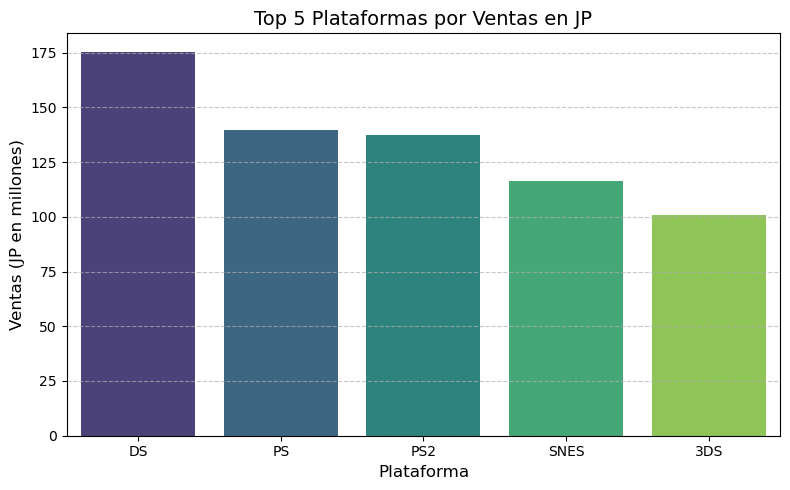

In [47]:
# Definir las regiones
regions = ['na_sales', 'eu_sales', 'jp_sales']

print("--- Análisis de las Cinco Plataformas Principales por Región ---")

for region in regions:
    # Calcular las ventas por plataforma para la región actual
    platform_sales_region = df.groupby('platform')[region].sum().sort_values(ascending=False)

    # Seleccionar las cinco plataformas principales
    top_5_platforms = platform_sales_region.head(5)

    print(f"\nTop 5 Plataformas en {region.upper().replace('_SALES', '')}:")
    print(top_5_platforms)

    # Visualización
    plt.figure(figsize=(8, 5))
    sns.barplot(x=top_5_platforms.index, y=top_5_platforms.values, palette='viridis', hue=top_5_platforms.index, legend=False)
    plt.title(f'Top 5 Plataformas por Ventas en {region.upper().replace("_SALES", "")}', fontsize=14)
    plt.xlabel('Plataforma', fontsize=12)
    plt.ylabel(f'Ventas ({region.upper().replace("_SALES", "")} en millones)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


### Conclusion:
Descripción de Variaciones en Cuotas de Mercado 

1. Norteamérica (NA): El Reinado de Microsoft y la Consola Doméstica
Dominio de Xbox 360: La Xbox 360 (X360) lidera las ventas en NA con una ventaja significativa sobre PS2. Esto confirma el histórico éxito de Microsoft en su mercado local, donde la Xbox ha tenido una penetración mucho mayor que en otras regiones.
Fuerte Presencia de Consolas Domésticas: Las tres primeras posiciones (X360, PS2, Wii, PS3) están ocupadas por consolas de sobremesa, indicando una fuerte preferencia por este formato de juego en Norteamérica.
Nintendo y PlayStation en Segundo Plano (pero fuertes): PS2 y Wii muestran ventas muy robustas, seguidas de PS3 y DS. Aunque X360 es la #1, las otras plataformas también tuvieron un éxito masivo, reflejando un mercado diversificado, pero con una inclinación particular hacia Xbox.
Consolas Portátiles: La DS es la única consola portátil en el top 5, lo que muestra su popularidad general, pero en un contexto dominado por las consolas de sobremesa en NA.

2. Europa (EU): Un Mercado PlayStation-Centrado y Competitivo
Liderazgo de PlayStation: PS2 y PS3 ocupan las dos primeras posiciones, lo que subraya la fuerte lealtad y adopción de la marca PlayStation en Europa a lo largo de las generaciones.
Competencia entre Generaciones: Las ventas de PS3 están muy cerca de las de PS2, lo que sugiere una transición de mercado exitosa para PlayStation en Europa.
Xbox 360 Respetable, pero No Líder: X360 se posiciona en tercer lugar, con ventas significativas, pero claramente por debajo de las plataformas PlayStation. Esto indica que Xbox tuvo un buen rendimiento en Europa, pero no logró el mismo nivel de dominio que en Norteamérica.
Wii como Contendiente Fuerte: La Wii se mantiene en el top 5, mostrando su atractivo masivo en el mercado europeo también.
PS1 como Consola de Legado: La presencia de la PS (PlayStation 1) en el top 5 de Europa (y no en NA) es interesante. Sugiere que la base instalada y la longevidad de su ciclo de vida en Europa fue particularmente fuerte, manteniendo ventas significativas que la hacen entrar en el top histórico.

3. Japón (JP): El Dominio Inquebrantable de Nintendo y las Portátiles
Nintendo es Rey: La DS y la 3DS (la consola más nueva en el top 5) demuestran el abrumador dominio de Nintendo y el formato portátil en el mercado japonés.
Preferencia por Portátiles: Cuatro de las cinco plataformas principales son consolas portátiles o tienen un fuerte componente portátil (DS, 3DS, PS, PS2 que también tenía una fuerte biblioteca para móviles).
El Legado de PlayStation (Old-Gen): PS y PS2 aún ocupan lugares prominentes, pero detrás de la DS. Esto muestra la fuerte huella que PlayStation dejó en Japón en sus primeras generaciones.
SNES como Clásico Imperecedero: La inclusión de la SNES en el top 5 japonés es un testimonio de la increíble popularidad y el legado duradero de Nintendo en su mercado local. Es la única consola de una generación tan antigua en aparecer en un top 5 regional, lo que no sucede en NA ni EU con la misma prominencia (donde sus sucesores inmediatos, N64 y GC, no están en el top 5).
Ausencia Notoria de Xbox: La ausencia total de cualquier consola Xbox del top 5 de Japón es una de las variaciones más llamativas. Confirma que la marca Xbox ha tenido históricamente una adopción muy limitada en el mercado japonés.

### Conclusiones Generales sobre las Variaciones en Cuotas de Mercado:
Diferencias Culturales y Preferencias Históricas: Las preferencias regionales están fuertemente influenciadas por la historia y la cultura del gaming en cada área. Norteamérica favorece a Xbox y consolas de sobremesa, Europa se inclina por PlayStation, y Japón es el bastión de Nintendo y las consolas portátiles.
Impacto de los Fabricantes Locales: El éxito de Xbox en NA y de Nintendo en JP demuestra cómo las compañías con raíces locales o un fuerte enfoque de marketing en una región pueden dominar su mercado.
Mercados Diversos: Aunque existen líderes claros, todas las regiones muestran una diversidad en las plataformas populares, lo que subraya que el mercado global de videojuegos no es homogéneo.
Longevidad de Plataformas Exitosas: Plataformas como PS2, PS, Wii, y DS demuestran su longevidad y alcance global al aparecer en los top 5 de múltiples regiones. La SNES es un caso especial de longevidad en Japón.

## 2.Los Cinco Géneros Principales por Región
Similar al análisis de plataformas, pero para géneros.


--- Análisis de los Cinco Géneros Principales por Región ---

Top 5 Géneros en NA:
genre
Action      863.17
Sports      671.20
Shooter     584.83
Platform    444.44
Misc        399.57
Name: na_sales, dtype: float64


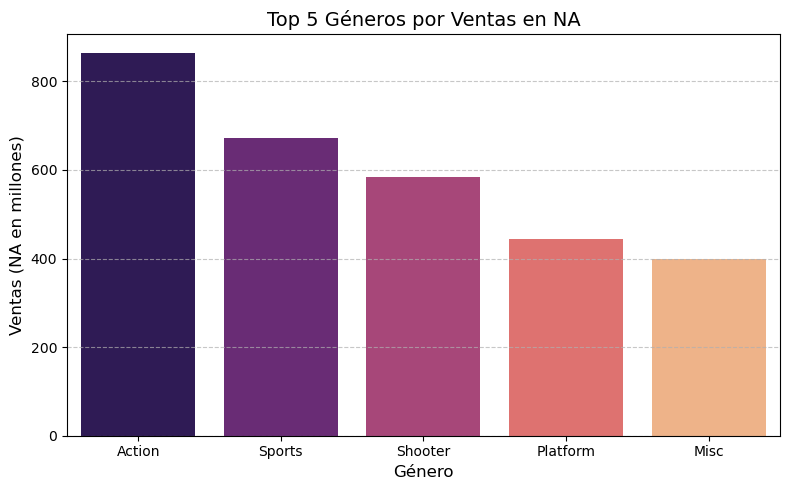


Top 5 Géneros en EU:
genre
Action     510.99
Sports     371.33
Shooter    314.52
Racing     234.49
Misc       210.60
Name: eu_sales, dtype: float64


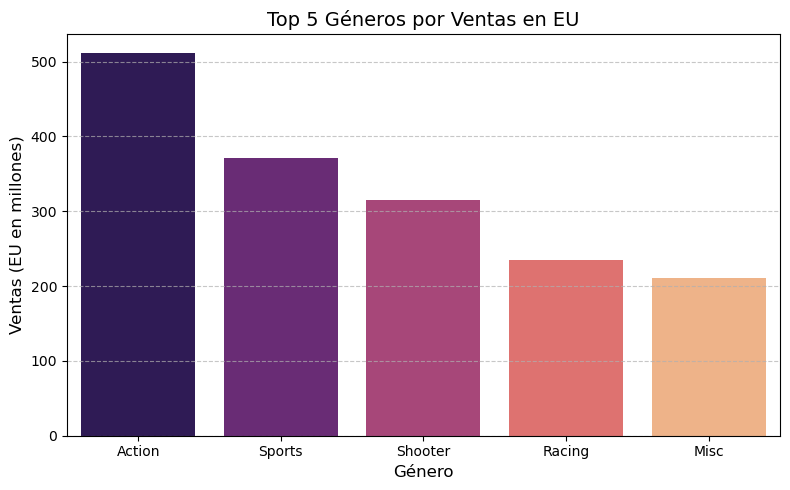


Top 5 Géneros en JP:
genre
Role-Playing    353.39
Action          160.14
Sports          134.93
Platform        130.71
Misc            107.02
Name: jp_sales, dtype: float64


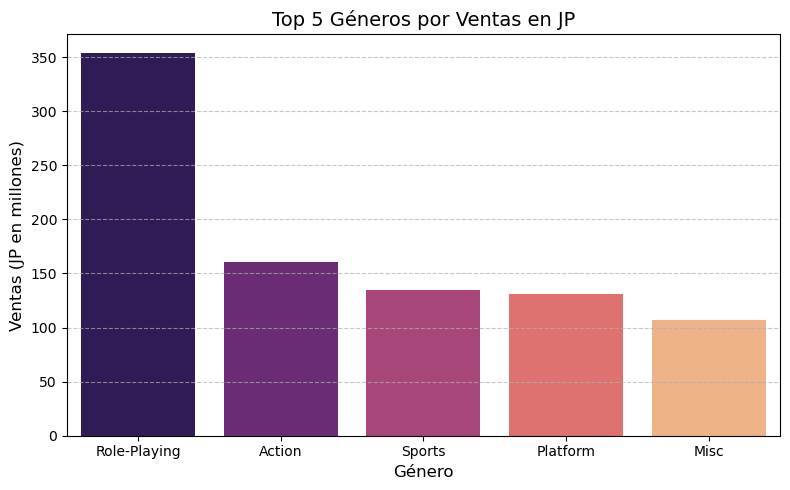

In [48]:
print("\n--- Análisis de los Cinco Géneros Principales por Región ---")

for region in regions:
    # Calcular las ventas por género para la región actual
    genre_sales_region = df.groupby('genre')[region].sum().sort_values(ascending=False)

    # Seleccionar los cinco géneros principales
    top_5_genres = genre_sales_region.head(5)

    print(f"\nTop 5 Géneros en {region.upper().replace('_SALES', '')}:")
    print(top_5_genres)

    # Visualización (opcional)
    plt.figure(figsize=(8, 5))
    sns.barplot(x=top_5_genres.index, y=top_5_genres.values, palette='magma', hue=top_5_genres.index, legend=False)
    plt.title(f'Top 5 Géneros por Ventas en {region.upper().replace("_SALES", "")}', fontsize=14)
    plt.xlabel('Género', fontsize=12)
    plt.ylabel(f'Ventas ({region.upper().replace("_SALES", "")} en millones)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

### Conclusiones:
Explicación de Diferencias en Géneros

1. Norteamérica (NA): El Reino de la Acción, Deportes y Disparos
Dominio Absoluto de la Acción y Competencia: Los géneros Action, Sports y Shooter son los tres pilares de las ventas en Norteamérica, con el género de Acción liderando por un margen considerable. Esto refleja una fuerte preferencia por juegos dinámicos, competitivos y a menudo con narrativas impulsadas por el combate o la habilidad atlética.
Plataformas y Misceláneos como Soporte: Los géneros Platform y Misc también son populares, lo que indica un mercado que valora la diversidad, pero con una clara inclinación hacia experiencias más directas y de alto octanaje.
Enfoque Occidental: Esta distribución de géneros es muy típica de los mercados occidentales, donde los juegos deportivos (como FIFA, Madden, NBA 2K) y los shooters (Call of Duty, Halo) son gigantes.

2. Europa (EU): Similar a NA, Pero con el Toque de Carreras
Patrón Similar a NA: Al igual que en Norteamérica, Action, Sports y Shooter son los tres géneros principales en Europa. Esto sugiere que las preferencias generales en estos géneros son compartidas entre ambos continentes occidentales.
La Peculiaridad de las Carreras (Racing): La diferencia clave es la presencia de Racing en el top 5 europeo, desplazando a Platform (que está en el top 5 de NA). Esto podría indicar una mayor afinidad por los juegos de carreras en Europa, quizás influenciada por la popularidad del automovilismo y las carreras en la cultura europea (ej., Fórmula 1, rally). Juegos como Gran Turismo o Forza suelen tener un fuerte seguimiento aquí.
Menos Disparidad: Las diferencias entre los géneros principales en Europa son un poco menos pronunciadas que en NA, aunque la Acción sigue siendo el líder claro.

3. Japón (JP): El Santuario del Rol y las Experiencias Únicas
El Reinado del Rol (Role-Playing): La diferencia más impactante es el abrumador dominio del género Role-Playing (Juegos de Rol) en Japón. Supera con creces a todos los demás géneros. Esto es un reflejo directo de la profunda apreciación cultural por los RPGs en Japón, con franquicias como Final Fantasy, Dragon Quest y Pokémon siendo pilares de la industria.
Caída de Shooters y Deportes: Los géneros Shooter y Sports, que son pilares en Occidente, caen significativamente en el ranking japonés. Sports está en tercer lugar (muy por debajo del Rol) y Shooter ni siquiera entra en el top 5. Esto muestra una marcada divergencia en las preferencias.
Importancia de Plataformas: El género Platform mantiene una fuerte presencia, lo cual es coherente con la popularidad de las consolas de Nintendo en Japón, hogar de franquicias icónicas de plataformas como Mario.
Categoría "Misc" Elevada: La categoría "Misc" también es notable en el top 5 japonés, lo que podría indicar una mayor inclinación hacia juegos únicos, experimentales o que no encajan fácilmente en categorías tradicionales, reflejando la innovación y diversidad del mercado japonés.
Aventura Desaparecida del Top: A pesar de tener un gran número de lanzamientos globales, el género Aventura no aparece en el top 5 de Japón.


### Explicación de las Diferencias Clave:
Preferencias Culturales e Históricas: La diferencia más fundamental radica en las preferencias culturales y la evolución histórica de la industria en cada región.

+ Occidente (NA/EU): Ha sido moldeado por la popularidad de los juegos de acción, deportes y disparos, que a menudo se benefician de gráficos punteros, competitividad online y un atractivo masivo. Las consolas como Xbox y PlayStation han potenciado estos géneros.
+ Japón: Su mercado está profundamente arraigado en los JRPGs, que a menudo priorizan la narrativa, el desarrollo de personajes y sistemas de juego complejos. La popularidad de Nintendo también influye en la predilección por juegos de plataformas y otros géneros más "familiares" o innovadores. Los juegos de acción en Japón son a menudo de un estilo diferente (ej., "hack-and-slash" o de estilo anime) que los shooters realistas occidentales.
Influencia de Desarrolladores Locales: Las principales empresas de desarrollo en cada región a menudo se especializan en ciertos géneros, lo que refuerza las tendencias de ventas. Empresas japonesas como Square Enix, Nintendo y Level-5 son líderes en RPG y Plataformas, mientras que estudios occidentales como EA, Activision y Ubisoft son potencias en Sports, Shooter y Action.
Adopción de Consolas: La preferencia por ciertas plataformas (Xbox en NA, PlayStation en EU, Nintendo/Portátiles en JP) se alinea con los géneros que tradicionalmente han prosperado en esas plataformas. Los juegos de rol suelen ser muy populares en PlayStation y consolas portátiles, mientras que los shooters prosperan en Xbox y PlayStation.

+ En resumen, mientras que los géneros de Acción, Deportes y Shooter dominan en Norteamérica y Europa, Japón se destaca por su marcada preferencia por los juegos de Rol. Estas diferencias son cruciales para cualquier desarrollador o editor que busque entrar en mercados específicos.


## 3-Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.
Aquí necesitaremos agrupar por rating y región, y luego visualizar las ventas.


--- Análisis del Impacto de las Clasificaciones ESRB en las Ventas por Región ---

Ventas por Clasificación ESRB en NA:
rating
E            1274.24
Not Rated    1225.84
T             747.60
M             742.89
E10+          345.50
K-A             2.56
EC              1.53
AO              1.26
RP              0.00
Name: na_sales, dtype: float64


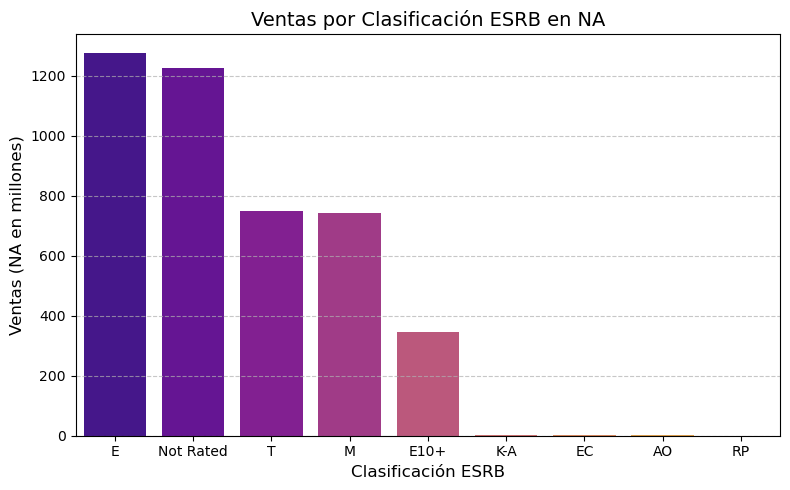


Ventas por Clasificación ESRB en EU:
rating
E            703.87
Not Rated    609.65
M            480.00
T            421.79
E10+         183.35
AO             0.61
K-A            0.27
EC             0.11
RP             0.03
Name: eu_sales, dtype: float64


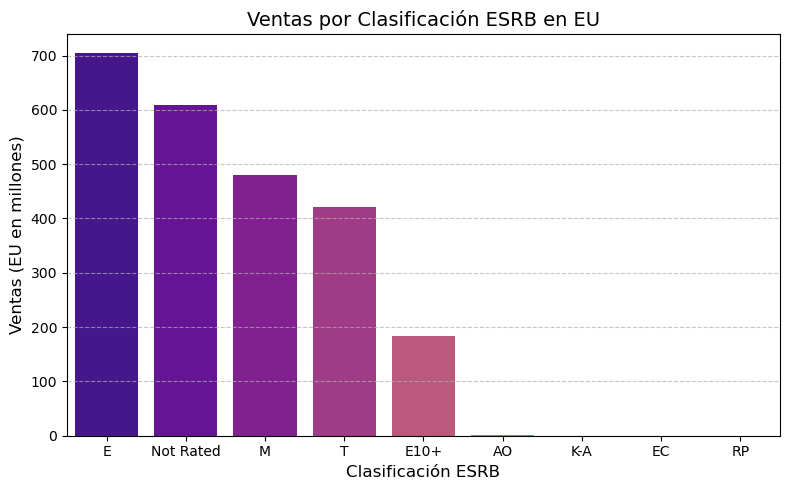


Ventas por Clasificación ESRB en JP:
rating
Not Rated    836.74
E            197.96
T            150.70
M             63.58
E10+          40.20
K-A            1.46
AO             0.00
EC             0.00
RP             0.00
Name: jp_sales, dtype: float64


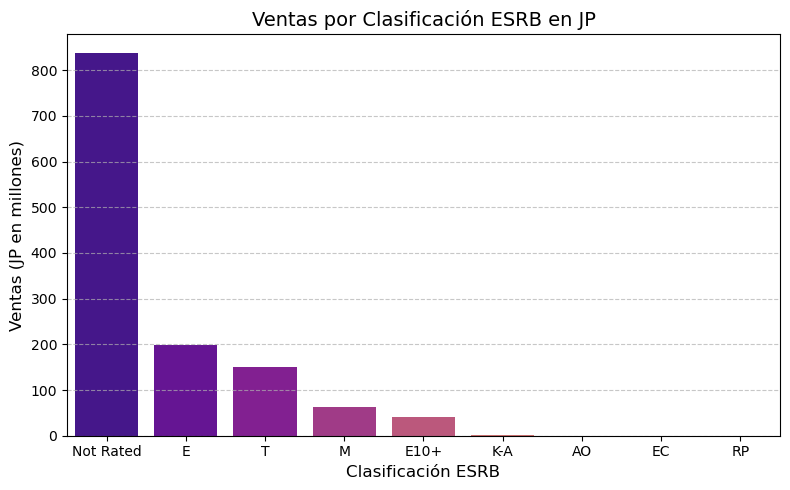

In [49]:
print("\n--- Análisis del Impacto de las Clasificaciones ESRB en las Ventas por Región ---")

for region in regions:
    # Calcular las ventas por clasificación ESRB para la región actual
    rating_sales_region = df.groupby('rating')[region].sum().sort_values(ascending=False)

    print(f"\nVentas por Clasificación ESRB en {region.upper().replace('_SALES', '')}:")
    print(rating_sales_region)

    # Visualización (opcional)
    plt.figure(figsize=(8, 5))
    sns.barplot(x=rating_sales_region.index, y=rating_sales_region.values, palette='plasma', hue=rating_sales_region.index, legend=False)
    plt.title(f'Ventas por Clasificación ESRB en {region.upper().replace("_SALES", "")}', fontsize=14)
    plt.xlabel('Clasificación ESRB', fontsize=12)
    plt.ylabel(f'Ventas ({region.upper().replace("_SALES", "")} en millones)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


### Conclusiones sobre el Impacto de Clasificaciones ESRB 

+ La ESRB asigna categorías de edad a los videojuegos, como "E" para "Todos" (para todas las edades), "E10+" para "Todos +10" (para mayores de 10 años), "T" para "Adolescentes" (para mayores de 13 años), "M" para "Maduro" (para mayores de 17 años) y "AO" para "Adultos únicamente" (solo para mayores de 18 años). La clasificación K-A significa "Niños a Adultos" (Kids to Adults en inglés), EC (Early Childhood) significa "Infancia temprana" y se asigna a juegos que contienen contenido considerado adecuado para niños a partir de los 3 años de edad. RP significa "Clasificación Pendiente" (Rating Pending en inglés). Esto indica que un juego aún no ha sido evaluado por la ESRB para asignarle una clasificación de edad definitiva. 

1. Norteamérica (NA): Un Mercado Diverso Dominado por "Everyone" y "Not Rated"
"E" (Everyone) a la Cabeza: Los juegos con clasificación "E" (para todos) lideran las ventas en Norteamérica. Esto es esperable, ya que estos juegos tienen el público más amplio posible, incluyendo familias.
"Not Rated" como Segundo Fuerte Contendiente: Sorprendentemente, los juegos "Not Rated" (sin clasificar) ocupan el segundo lugar, muy cerca de "E". 
Posibles Razones: Esto podría deberse a varias razones: (Recordemos que asi asignamos a nustros valores asuentes)
Juegos muy antiguos de los primeros años del dataset, antes de que ESRB fuera omnipresente o si la clasificación no se registró.
Juegos que no se sometieron a la clasificación ESRB por alguna razón.
Juegos distribuidos digitalmente donde la clasificación es diferente o no se aplica de la misma manera en los registros.
Implicación: La falta de clasificación explícita no ha impedido las ventas significativas, lo que sugiere que para una parte de los juegos (especialmente los más antiguos o de ciertas distribuciones), la clasificación ESRB no fue un factor limitante, o el dato simplemente no está disponible.
Importancia de "Teen" y "Mature": Las categorías "T" (Teen, para adolescentes) y "M" (Mature, para mayores de 17 años) también muestran ventas muy sólidas, muy cerca una de la otra. Esto refleja la gran base de jugadores adolescentes y adultos en NA que consumen una amplia variedad de juegos, incluyendo títulos más "maduros" y complejos.
Minorías de Otros Ratings: Las clasificaciones como E10+, K-A (Kids to Adults), EC (Early Childhood) y AO (Adults Only) tienen ventas mucho menores, siendo AO prácticamente insignificante, lo que indica que el mercado de juegos para adultos extremos es muy pequeño en términos de volumen de ventas general.


2. Europa (EU): Patrón Similar a NA, con Fuerte Presencia "Mature"
"E" y "Not Rated" Lideran: El patrón es muy similar a Norteamérica, con los juegos "E" y "Not Rated" encabezando las ventas.
"Mature" Más Prominente que "Teen": Una diferencia notable es que los juegos "M" (Mature) tienen ventas más altas que los juegos "T" (Teen) en Europa (480.00M vs 421.79M). Esto sugiere que el mercado europeo, en particular, tiene una gran afinidad por los títulos dirigidos a adultos, quizás incluso más acentuada que en Norteamérica para algunos tipos de juegos.
Consistencia General: Aparte de la ligera inversión en el orden de "M" y "T", las proporciones generales de ventas por rating son consistentes con NA, lo que sugiere una cultura de consumo de juegos similar en ambos mercados occidentales.


3. Japón (JP): Dominio de "Not Rated" y Menor Influencia de ESRB
"Not Rated" es el Rey Absoluto: En Japón, la categoría "Not Rated" domina con un margen abrumador (836.74M), superando con creces a todas las demás clasificaciones combinadas.
Implicación Clave: Esto es fundamental. El ESRB es un sistema de clasificación principalmente norteamericano. Japón tiene su propio sistema de clasificación de juegos, como la CERO (Computer Entertainment Rating Organization). Es muy probable que muchos juegos vendidos en Japón no tengan una clasificación ESRB porque se clasificaron bajo el sistema CERO, o simplemente no se les aplicó una clasificación ESRB en el dataset. (porque para nosotros estaban como valores nulos)
Esto significa que las clasificaciones de ESRB como tal tienen un impacto directo muy limitado en las ventas en Japón. La decisión de compra de un juego en Japón se vería influenciada por su clasificación CERO (o la falta de una si es un juego muy antiguo/nicho), no por la ESRB.
Ventas Menores para Clasificaciones E, T, M: Aunque "E", "T" y "M" aparecen, sus ventas son considerablemente más bajas que en NA y EU, y están muy por debajo de la categoría "Not Rated". Esto refuerza la idea de que estas clasificaciones son menos relevantes para el mercado japonés.
Ausencia Total de AO/EC/RP: Algunas clasificaciones (AO, EC, RP) no registran ventas en Japón, lo cual es esperable dada la naturaleza del sistema de clasificación.

### Conclusiones Generales sobre el Impacto de las Clasificaciones ESRB:
Relevancia Regional del ESRB: Las clasificaciones ESRB son claramente muy relevantes en Norteamérica y Europa, donde los juegos con clasificación "E" (para público amplio) y "M" (para adultos, a menudo asociado a géneros como Shooter y Action) son los principales motores de ventas.
"Not Rated" como Categoría de Legado/Desconocido: La categoría "Not Rated" es significativa en todas las regiones, pero especialmente en Japón. Esto puede ser un artefacto de la recopilación de datos (juegos antiguos, falta de información) o una indicación de que la falta de una clasificación específica del ESRB no detuvo las ventas si el juego era popular o se clasificaba bajo un sistema local.
Japón: Un Ecosistema de Clasificación Diferente: El mercado japonés opera con un sistema de clasificación diferente (CERO), lo que hace que las clasificaciones ESRB sean mayormente irrelevantes para las ventas directas en esa región. Los datos con "Not Rated" en Japón probablemente corresponden a juegos clasificados por CERO.


# Paso 5. Prueba las siguientes hipótesis:

Las pruebas de hipótesis nos permiten determinar si las diferencias que vemos en nuestros datos son estadísticamente significativas o si podrían deberse simplemente al azar.


## Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

### Paso 1: Formulación de las Hipótesis
+ Hipótesis Nula: Las calificaciones promedio de los usuarios para los juegos de Xbox One y PC son las mismas.
+ Hipótesis Alternativa: Las calificaciones promedio de los usuarios para los juegos de Xbox One y PC son diferentes.

Dado que estamos comparando las medias de dos muestras independientes y no tenemos información sobre la desviación estándar de la población, y el tamaño de las muestras probablemente es grande, la prueba estadística adecuada es una prueba t de Student para dos muestras independientes.

### Paso 2: Preparación de los Datos
Necesitamos extraer las puntuaciones de usuario para los juegos de Xbox One y PC. 

In [50]:
# Filtrar los datos para Xbox One y PC
user_scores_xone = df[df['platform'] == 'XOne']['user_score']
user_scores_pc = df[df['platform'] == 'PC']['user_score']

print(f"Número de juegos con user_score para Xbox One: {len(user_scores_xone)}")
print(f"Número de juegos con user_score para PC: {len(user_scores_pc)}")

# Calcular las medias de las muestras
mean_xone = user_scores_xone.mean()
mean_pc = user_scores_pc.mean()

print(f"\nMedia de user_score para Xbox One: {mean_xone:.2f}")
print(f"Media de user_score para PC: {mean_pc:.2f}")

Número de juegos con user_score para Xbox One: 247
Número de juegos con user_score para PC: 957

Media de user_score para Xbox One: 6.68
Media de user_score para PC: 7.08


### Paso 3: Realizar la Prueba t de Student
Usaremos `scipy.stats.ttest_ind` para realizar la prueba t. Un aspecto importante es el parámetro `equal_var`. Si asumimos que las varianzas de las poblaciones de las que provienen las muestras son iguales, usamos `equal_var=True` . Si no asumimos que las varianzas son iguales, usamos `equal_var=False` desiguales).
Sin embargo, para fines prácticos, usaremos `(equal_var=False)`, aunque se me ocurre usar la prueba `st.levene` para quitarme de dudas. 

In [51]:
# Realizamos la prueba t de Student (asumiendo varianzas desiguales)
# Podemos probar la igualdad de varianzas primero, usando el siguiente codigo: 
print(st.levene(user_scores_xone, user_scores_pc))

alpha = 0.05 #establece un nivel crítico de significación estadística
results = st.ttest_ind(user_scores_xone, user_scores_pc, equal_var=False)
print('valor p:', results.pvalue) #imprime el valor p obtenido

#compara el valor p con la significación estadística):
if results.pvalue < alpha: 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

LeveneResult(statistic=np.float64(3.151628177866301), pvalue=np.float64(0.07610423950006148))
valor p: 9.754922346969619e-06
Rechazamos la hipótesis nula


### Análisis de lo que realizamos

1. Prueba de Levene para la Igualdad de Varianzas
LeveneResult(statistic=3.151628177866301, pvalue=0.07610423950006148)

Estadístico de Levene (statistic): 3.15

Valor p (pvalue): 0.076

Interpretación: La prueba de Levene evalúa la hipótesis nula de que las varianzas de las poblaciones son iguales. Con un p-valor de 0.076, y un nivel de significancia α=0.05:

Dado que p-valor (0.076) ≥α (0.05), no rechazamos la hipótesis nula de la prueba de Levene.
### Conclusión: 
Esto significa que hay suficiente evidencia estadística para asumir que las varianzas de las calificaciones de usuario de Xbox One y PC son iguales.

2. Implicación para la Prueba t: Como la prueba de Levene sugiere varianzas iguales,  podriamos haber usado `equal_var=True` en  `ttest_ind`
Vamos a ver ahora los resultados cambiando a `equal_var=True`, ya que sabemos que asi es la menera correcta. 

In [52]:
# Realizamos la prueba t de Student (asumiendo varianzas iguales)
alpha = 0.05 #establece un nivel crítico de significación estadística
results = st.ttest_ind(user_scores_xone, user_scores_pc, equal_var=True)
print('valor p:', results.pvalue) #imprime el valor p obtenido

#compara el valor p con la significación estadística):
if results.pvalue < alpha: 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 3.0500850678177977e-05
Rechazamos la hipótesis nula


### Interpretación de Resultados: 

El p-valor (0.0000305) es significativamente menor que nuestro nivel de significancia α (0.05).
Por lo tanto, Rechazamos la hipótesis nula.

Al rechazar la hipótesis nula, concluimos que hay evidencia estadística muy fuerte para afirmar que las calificaciones promedio de los usuarios para los juegos de Xbox One y PC son estadísticamente diferentes.

Recapitulando la información previa: Cuando calculamos las medias antes de la prueba, obtuvimos:
+ Media de user_score para Xbox One: 6.68
+ Media de user_score para PC: 7.08

La prueba nos dice que la diferencia observada entre 6.68 (XOne) y 7.08 (PC) no es aleatoria. Es una diferencia real y estadísticamente significativa. Esto implica que, en promedio, los usuarios tienden a calificar los juegos de PC más alto que los de Xbox One.

Esto sugiere que las audiencias en PC pueden tener expectativas o valoraciones diferentes, o que la calidad promedio percibida de los juegos lanzados en PC es mayor según los usuarios, en comparación con los juegos de Xbox One.

por lo que ya podemos responder a la presgunta
+ ¿Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.?
   - No, las calificaciones promedio de los usuarios para las plataformas Xbox One y PC NO son las mismas.

## Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

### Paso 1: Formulación de las Hipótesis
+ Hipótesis Nula: Las calificaciones promedio de los usuarios para los juegos del género Acción y del género Deportes son las mismas.
+ Hipótesis Alternativa: Las calificaciones promedio de los usuarios para los juegos del género Acción y del género Deportes son diferentes.

Al igual que antes, utilizaremos una prueba t de Student para dos muestras independientes.

### Paso 2: Preparación de los Datos
Necesitamos extraer las puntuaciones de usuario para los juegos de los géneros "Action" y "Sports",

In [53]:
# Filtrar los datos para los géneros Action y Sports
user_scores_action = df[df['genre'] == 'Action']['user_score']
user_scores_sports = df[df['genre'] == 'Sports']['user_score']

print(f"Número de juegos con user_score para el género Acción: {len(user_scores_action)}")
print(f"Número de juegos con user_score para el género Deportes: {len(user_scores_sports)}")

# Calcular las medias de las muestras para contextualizar
mean_action = user_scores_action.mean()
mean_sports = user_scores_sports.mean()

print(f"\nMedia de user_score para el género Acción: {mean_action:.2f}")
print(f"Media de user_score para el género Deportes: {mean_sports:.2f}")

Número de juegos con user_score para el género Acción: 3307
Número de juegos con user_score para el género Deportes: 2306

Media de user_score para el género Acción: 7.09
Media de user_score para el género Deportes: 7.04


### Nota:
Ya podemos ir detectando que efectivamnete las calificaciones promedio de los usuarios para los géneros de Acción y Deportes NO son muy diferentes.

### Paso 3: Realizar las Pruebas Estadísticas
Primero, realizaremos la prueba de Levene para verificar la igualdad de varianzas. Luego, usaremos el resultado para elegir el parámetro equal_var en la prueba t de Student.

In [54]:
# Realizar la prueba de Levene para la igualdad de varianzas
print(st.levene(user_scores_action, user_scores_sports))

LeveneResult(statistic=np.float64(0.0845448969862126), pvalue=np.float64(0.771240997037353))


Rapidamente: 
+ Dado que p-valor (0.77) ≥α (0.05), no rechazamos la hipótesis nula de la prueba de Levene.
 - esto significa que podmeos usar `equal_var=True`
 - Hay suficiente evidencia estadística para asumir que las varianzas de las calificaciones de usuario para los géneros Acción y Deportes son iguales. 

In [55]:
# Realizamos la prueba t de Student (con varianzas iguales)
alpha = 0.05 
# Realizar la prueba t de Student
results = st.ttest_ind(user_scores_action, user_scores_sports, equal_var=True)
print('valor p:', results.pvalue) #imprime el valor p obtenido

#compara el valor p con la significación estadística):
if results.pvalue < alpha: 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


valor p: 0.12360284127621433
No podemos rechazar la hipótesis nula


### Interpretación de Resultados:

El p-valor (0.1236028) es mayor que nuestro nivel de significancia α (0.05).
Por lo tanto, No podemos rechazar la hipótesis nula.

Al no poder rechazar la hipótesis nula, concluimos que no hay evidencia estadística suficiente para afirmar que las calificaciones promedio de los usuarios para los juegos de los géneros Acción y Deportes son significativamente diferentes.

Aunque las medias de las muestras de Acción y Deportes puedan ser ligeramente diferentes
+ Media de user_score para el género Acción: 7.09
+ Media de user_score para el género Deportes: 7.04

esta prueba nos dice que esa diferencia observada es tan pequeña que podría deberse simplemente al azar, y no a una diferencia fundamental en las preferencias de calificación de los usuarios entre estos dos géneros.
Implicación: Desde la perspectiva de las calificaciones de usuario, los juegos de Acción y los juegos de Deportes son percibidos de manera similar en promedio por los usuarios. Esto contrasta con el hallazgo anterior entre Xbox One y PC, donde sí se encontró una diferencia significativa.

por lo que ya podemos responder a la presgunta
+ ¿Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.?
   - No, las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son las mismas o la diferencia observada es tan pequeña que podría ser resultado del azar


## Establece tu mismo el valor de umbral alfa.

¿Por Qué Usamos α=0.05 en Ambos Casos?
Para ambas pruebas de Hipótesis, tomamos el mismo valor para `alpha = 0.05` y es el valor más común.

El valor α (alfa) se conoce como el nivel de significancia o la probabilidad de error Tipo I.

Probabilidad de Error Tipo I:
α=0.05 significa que estamos dispuestos a aceptar una probabilidad del 5% de cometer un Error Tipo I.
Un Error Tipo I ocurre cuando rechazamos la hipótesis nula.

Es importante destacar que α=0.05 no es una ley. Es una elección de nosotros mismos que se hace antes de realizar la prueba para definir qué tan fuerte debe ser la evidencia para rechazar la hipótesis nula.
En nuestras pruebas, al usar α=0.05 en ambos casos (igualdad de varianzas y diferencia de medias), estamos aplicando el mismo estándar de rigor estadístico.
En resumen, usamos α=0.05 en ambos casos porque es el nivel de significancia convencional y ampliamente aceptado que proporciona un equilibrio razonable entre la probabilidad de cometer un error Tipo I y la capacidad de detectar diferencias reales, aplicando el mismo nivel de confianza estadística a todas las pruebas.

## Explica:

## Cómo formulaste las hipótesis nula y alternativa.

La forma en que formule ambas parejas de hipótesis se conoce como una prueba de hipótesis de dos colas (two-tailed test) o prueba bilateral. 
y basicamente salio de si la respuesta a las preguntas eran si o no. 
— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.   
+ Hipótesis Nula: Las calificaciones promedio de los usuarios para los juegos de Xbox One y PC SON LAS MISMAS.
+ Hipótesis Alternativa: Las calificaciones promedio de los usuarios para los juegos de Xbox One y PC SON DIFERENTES.

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
+ Hipótesis Nula: Las calificaciones promedio de los usuarios para los juegos del género Acción y del género Deportes SON LAS MISMAS.
+ Hipótesis Alternativa: Las calificaciones promedio de los usuarios para los juegos del género Acción y del género Deportes SON DIFERENTES.

Esto, refleja la idea de que si asumimos no hay diferencia hasta que la evidencia nos demuestre lo contrario y nos permite detectar diferencias en cualquier dirección sin tener que hacer suposiciones previas sobre la dirección de esa diferencia.

## Qué criterio utilizaste para probar las hipótesis y por qué.

Para probar ambas hipótesis (calificaciones de Xbox One vs. PC, y calificaciones de Acción vs. Deportes), utilizamos el criterio del p-valor (valor de probabilidad) en relación con el nivel de significancia (α) que establecimos previamente.

+ El Criterio:
Si el p valor<α (Nivel de Significancia):
Decisión: Rechazamos la hipótesis nula 
Razón: Esto significa que la probabilidad de observar una diferencia en nuestras muestras tan grande (o más grande) como la que obtuvimos, si la hipótesis nula fuera realmente cierta, es muy baja (menor que α). Es decir, el resultado que vemos es tan improbable bajo la suposición de la hipótesis nula que nos lleva a concluir que la hipótesis nula probablemente es falsa.
En términos prácticos, consideramos que la diferencia observada es estadísticamente significativa.

+ El Criterio:
Si el p valor≥α (Nivel de Significancia):
Decisión: No rechazamos la hipótesis nula 
Razón: Esto significa que la probabilidad de observar una diferencia en nuestras muestras tan grande (o más grande) como la que obtuvimos, si la hipótesis nula fuera realmente cierta, es relativamente alta (mayor o igual que α). Es decir, el resultado que vemos podría deberse fácilmente al azar o a la variabilidad natural del muestreo, y no hay evidencia suficiente para concluir que la hipótesis nula es falsa.
En términos prácticos, consideramos que la diferencia observada no es estadísticamente significativa.

¿Por Qué Usamos Este Criterio?
Este criterio es la base de las pruebas de hipótesis de significancia estadística y se utiliza por varias razones fundamentales:
+ Cuantificación de la Evidencia contra la hipótesis nula 
+ Control del Error Tipo I
+ Objetividad en la Decisión

En resumen, el criterio de comparar el p-valor con α es una metodología estandarizada que nos permite tomar decisiones informadas sobre nuestras hipótesis, controlando el riesgo de error y cuantificando la fuerza de la evidencia en nuestros datos.

# Paso 6. Escribe una conclusión general

### Conclusiones Generales del Análisis de Datos de Videojuegos
Nuestro análisis de los datos de ventas de videojuegos ha revelado varias ideas clave sobre la industria, las preferencias de los jugadores, la dinámica de las plataformas y la importancia de la calidad y el marketing.

1. La Industria de los Videojuegos es un Mercado de "Hits" 
+ Dominio de Pocos Títulos: Hemos observado consistentemente, a través del diagrama de caja de ventas globales por plataforma y por género, que la inmensa mayoría de las ventas de la industria provienen de un número relativamente pequeño de juegos "blockbuster" o "super-hits". La mediana de ventas para la mayoría de las plataformas y géneros está muy cerca de cero, lo que indica que la mayoría de los juegos no alcanzan ventas masivas.
Wii como Ejemplo: El caso de la Wii ilustra perfectamente esto: ventas totales masivas impulsadas por un puñado de títulos que vendieron decenas de millones, mientras que la gran mayoría de sus juegos vendieron muy poco.

2. Las Plataformas Tienen Ecosistemas y Ciclos de Vida Distintos
+ Varianza Extrema entre Plataformas: Las diferencias en las ventas totales entre plataformas son abismales, con algunas como Wii, PS2, PS3, X360, DS y GB dominando históricamente.
+ Influencia de la Base Instalada: Los juegos multiplataforma, como "Grand Theft Auto V", demuestran que el éxito inicial de un juego depende fuertemente de la base instalada de las plataformas dominantes en el momento de su lanzamiento.
+ Generaciones y Relanzamientos: Los relanzamientos en nuevas generaciones de consolas pueden generar ventas adicionales significativas ("Grand Theft Auto V" en PS4/XOne), pero a menudo no igualan las ventas de la generación original debido a la menor base instalada en el momento del relanzamiento o la recompra por parte de los fans.
+ Diferencias Regionales en la Adopción de Plataformas:
  + Norteamérica (NA): Marcado dominio de Xbox 360 y una fuerte presencia de consolas de sobremesa (PS2, Wii, PS3).
  + Europa (EU): Fuerte inclinación hacia PlayStation (PS2, PS3) y una competencia saludable de Xbox 360 y Wii.
  + Japón (JP): Un mercado único dominado abrumadoramente por las consolas portátiles de Nintendo (DS, 3DS) y la ausencia casi total de Xbox. El legado de PlayStation y SNES también es muy fuerte.


3. Las Preferencias de Género Varían Significativamente por Región
+ Dominios Globales con Matices Regionales:
  + Occidente (NA y EU): Los géneros Action, Sports y Shooter son los reyes en ventas totales, reflejando una preferencia por experiencias de juego dinámicas y competitivas. Europa muestra una afinidad ligeramente mayor por el género Racing.
  + Japón (JP): El género Role-Playing es, con diferencia, el más dominante y lucrativo, lo que subraya una profunda preferencia cultural por narrativas inmersivas y sistemas de juego complejos. Los géneros de Acción y Deportes, aunque presentes, tienen un peso mucho menor que en Occidente.
+ Estrategia de Género: Un desarrollador debe considerar las preferencias regionales al planificar lanzamientos de juegos por género para maximizar el potencial de mercado.


4. La Calidad Percibida Influye, Pero de Manera Compleja
+ Correlación entre Críticos y Ventas (PS4): En plataformas populares como la PS4, las puntuaciones de los críticos (critic_score) muestran una correlación positiva débil a moderada con las ventas globales. Los juegos con buenas críticas tienden a vender mejor, sugiriendo que la validación profesional influye en la decisión de compra, especialmente para los "blockbusters".
+ Poca Correlación entre Usuarios y Ventas (PS4): Sorprendentemente, las puntuaciones de los usuarios (user_score) mostraron una correlación casi nula con las ventas globales en la PS4. Esto puede deberse a que los usuarios que puntúan son un subconjunto más crítico, o que factores como el marketing y la popularidad de la franquicia tienen un peso mayor en las decisiones de compra del público general que las puntuaciones agregadas de los usuarios.
+ Calificaciones de Usuario de XOne vs. PC (Prueba de Hipótesis): Nuestra prueba reveló que las calificaciones promedio de los usuarios para Xbox One y PC son estadísticamente diferentes, con los juegos de PC tendiendo a recibir calificaciones promedio más altas. Esto sugiere que las audiencias de PC pueden tener expectativas o percepciones de calidad distintas.
+ Calificaciones de Usuario de Acción vs. Deportes (Prueba de Hipótesis): Por otro lado, no encontramos evidencia estadística suficiente para afirmar que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes. Esto indica que, a pesar de sus diferencias en gameplay y audiencia, los usuarios perciben la calidad de los juegos de estos dos géneros de manera similar en promedio.


5. Las Clasificaciones por Edad son Críticas Regionalmente
+ Relevancia Occidental del ESRB: Las clasificaciones ESRB (Entertainment Software Rating Board) son muy relevantes para las ventas en Norteamérica y Europa, donde los juegos clasificados "E" (Everyone) y "M" (Mature) dominan el mercado. La categoría "M" es particularmente fuerte en EU.
+ Irrelevancia del ESRB en Japón: En Japón, las clasificaciones ESRB son en gran medida irrelevantes, con la categoría "Not Rated" dominando abrumadoramente las ventas. Esto se debe a que Japón utiliza su propio sistema de clasificación (CERO), y los datos de ESRB no se aplican directamente al mercado japonés.


6. La Importancia de la Limpieza de Datos
+ La corrección de problemas como los espacios extra en los nombres de los juegos (como con "Frozen: Olaf's Quest") fue un paso crucial. Estos pequeños detalles de procesamiento de datos son esenciales para asegurar la precisión en el filtrado, la agrupación y, en última instancia, la fiabilidad de todos nuestros análisis y conclusiones.


### En síntesis:
La industria del videojuego es un ecosistema dinámico y fragmentado por preferencias regionales y la naturaleza de "hits" de sus productos. El éxito no solo depende de la calidad de un juego, sino también de su género, la plataforma en la que se lanza, el mercado objetivo y cómo se comunica su atractivo a través de marketing y clasificaciones por edad.


Reflexionando sobre todo el proceso, diría que el punto donde más "batallamos" o, para ponerlo en términos más técnicos, donde hubo más complejidad y la necesidad de decisiones cuidadosas, fue la gestión y el entendimiento de los datos faltantes y su impacto en el análisis, especialmente al principio.

# Termina Proyecto